In [1]:
### Importing python packages to use through Data Science Exercies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, metrics
import scikitplot as skplt
from mpl_toolkits.mplot3d import Axes3D

# Aunaltics Data Scientist Exercise II Segmentation
### Nolan Stoffer
### October 14, 2021

## Part 1 - Data Loading and Preparation
#### Data Loading
In this section the data files are loaded into Jupyter Notebook. Column names are assigned according to the data structure breakdown provided with this exercise. Data is combined for more efficient cleaning for the training and testing files.

In [2]:
    # Loading testing and training data csv files for use in exercise
train = pd.read_csv("au_train.csv")
test = pd.read_csv("au_test.csv")  
    
    # Assigning column headers according to data breakdown for testing and training data sets
dftrain = pd.DataFrame(data = train)
dftrain.columns = ['age', 'workclass','fnlwgt', 'education','education-num','marital-status', 'occupation', 'relationship', 'race',
'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annualclass']
#print(dftrain.columns)

dftest = pd.DataFrame(data= test)
dftest.columns = ['age', 'workclass','fnlwgt', 'education','education-num','marital-status', 'occupation', 'relationship', 'race',
'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annualclass']
#print(dftest.columns)

#### Data Cleaning
Cell values are cleaned to remove excess spaces. In looking through the data I noticed the categories in the "annualclass" variable are not consistent between the training and test data. The training categories are "<=50K" and ">50K", where the testing categories are "<=50K." and ">50K."
As part of cleaning I removed the extra period.

In [3]:
# Cleaning data to eliminate leading and trailing spaces
# clearing out period on the annualclass column in testing dataset
fulldata = pd.concat([dftrain, dftest],ignore_index=True)

fulldata['workclass'] = fulldata['workclass'].str.strip()
fulldata['education'] = fulldata['education'].str.strip()
fulldata['marital-status'] = fulldata['marital-status'].str.strip()
fulldata['occupation'] = fulldata['occupation'].str.strip()
fulldata['relationship'] = fulldata['relationship'].str.strip()
fulldata['race'] = fulldata['race'].str.strip()
fulldata['sex'] = fulldata['sex'].str.strip()
fulldata['native-country'] = fulldata['native-country'].str.strip()
fulldata['annualclass'] = fulldata['annualclass'].str.strip()
fulldata['annualclass'] = fulldata['annualclass'].str.strip(".")

#print(fulldata['workclass'].unique())
#print(fulldata['education'].unique())
#print(fulldata['marital-status'].unique())
#print(fulldata['occupation'].unique())
#print(fulldata['relationship'].unique())
#print(fulldata['race'].unique())
#print(fulldata['sex'].unique())
#print(fulldata['native-country'].unique())
#print(fulldata['annualclass'].unique())

enctrain = fulldata.iloc[0:32561,:]
enctest = fulldata.iloc[32561:48841,:]

In [4]:
fulldata.dtypes
fulldata.isnull().sum()
fulldata.head()
fulldata.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annualclass'],
      dtype='object')

# Theories / Assumptions
## Categorical Variables
- Age
    - 50 yr old makes more than 20 yr old
        - Under 22 most likely student
            - Entry level jobs entry level pay
        - Over 62 eligible for retirement
            - Social Security checks as primary income
            - Either retired, anticipating retirement, or working to stay active
- Education 
    - HS or less Makes less than any Higher Education degrees
        - Technical schools and Advanced degrees may make more than College
            - Depends on field and expertise
        - Education is directly related to Education-Num
- Workclass
    - Work class may impact annual income
        - Occupation would have more direct impact
- Education-NUM 
    - Same info as Education just encoded, redundant
- Marital-Status
    - People who are single most likely work longer hours
- Occupation
    - Direct impact on an indiviudal's annual income
        - Occupations varry in salary range
- Race
    - Each race earns at a different rate on average
- Sex / Gender
    - US Bureau of Labor and Statistics
        - Since 2004 women-men earnings ratio has been ~80%
- Native Country
    - Currency valuation between countries varries between  countries
    
- Fnlwgt
    - Current financial wealth of a given person
- Capital Gain
    - Increase to a person's financial wealth based on market investments
- Capital Loss
    - Decrease to a person's financial wealth based on market investments
- Hours per week
    - How long a given person spends at work earning money

## Bar Plots: Categorical Variables
The following block of code dives into each categorical variable for useful information

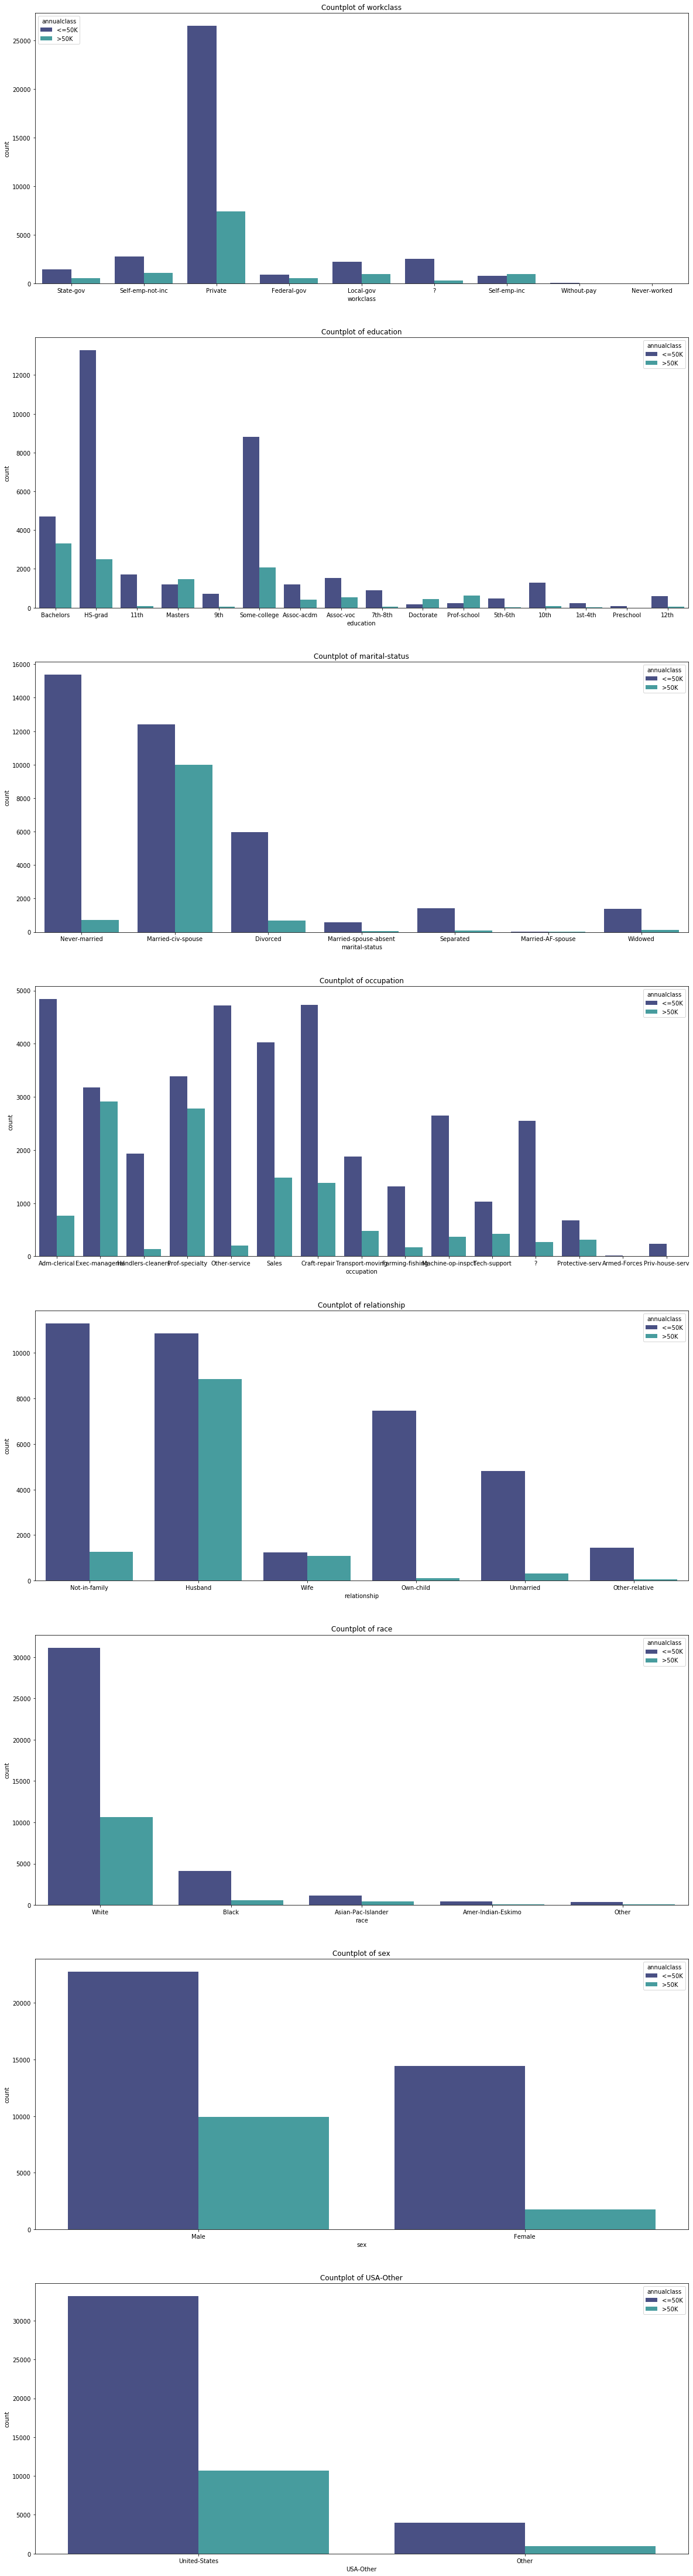

In [5]:
fulldata['USA-Other'] = ['United-States' if x =='United-States' else 'Other' for x in fulldata['native-country']]
plt.figure(1, figsize=(20,90))

m=0
for cats in ['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'USA-Other']:
    m += 1
    plt.subplot(9,1,m)
    #plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.countplot(x=cats, hue='annualclass', data=fulldata, palette = "mako")
    plt.title('Countplot of {}'.format(cats))
plt.show()

### Bar Plot Findings
- Most people work in the private work class, regardless of annual class.
- Most people earning over 50K have either Bachelors, HS Grad, Masters, or some college.
- Most people with Masters, Doctorate, Prof school earn over 50K.
- Most of the population has either HS Grad, Bachelors, or Some college.
- Most people making over 50K are Married Civ Spouse.
- Most people are either never married, married civ spouse, or divorced.
- Most people earning over 50K are either in Executive Management or Prof-specialty.
- Most people earning over 50K are husbands. Single people and wives are the next most popular familial role.
- Most people earning over 50K are white.
- Most people earning over 50K are male.
- Most people earning over 50K are from the USA.


## Violin Plots: Categorical VS Continuous
The following blocks of code create violin plots to relate categorical and continuous variables.

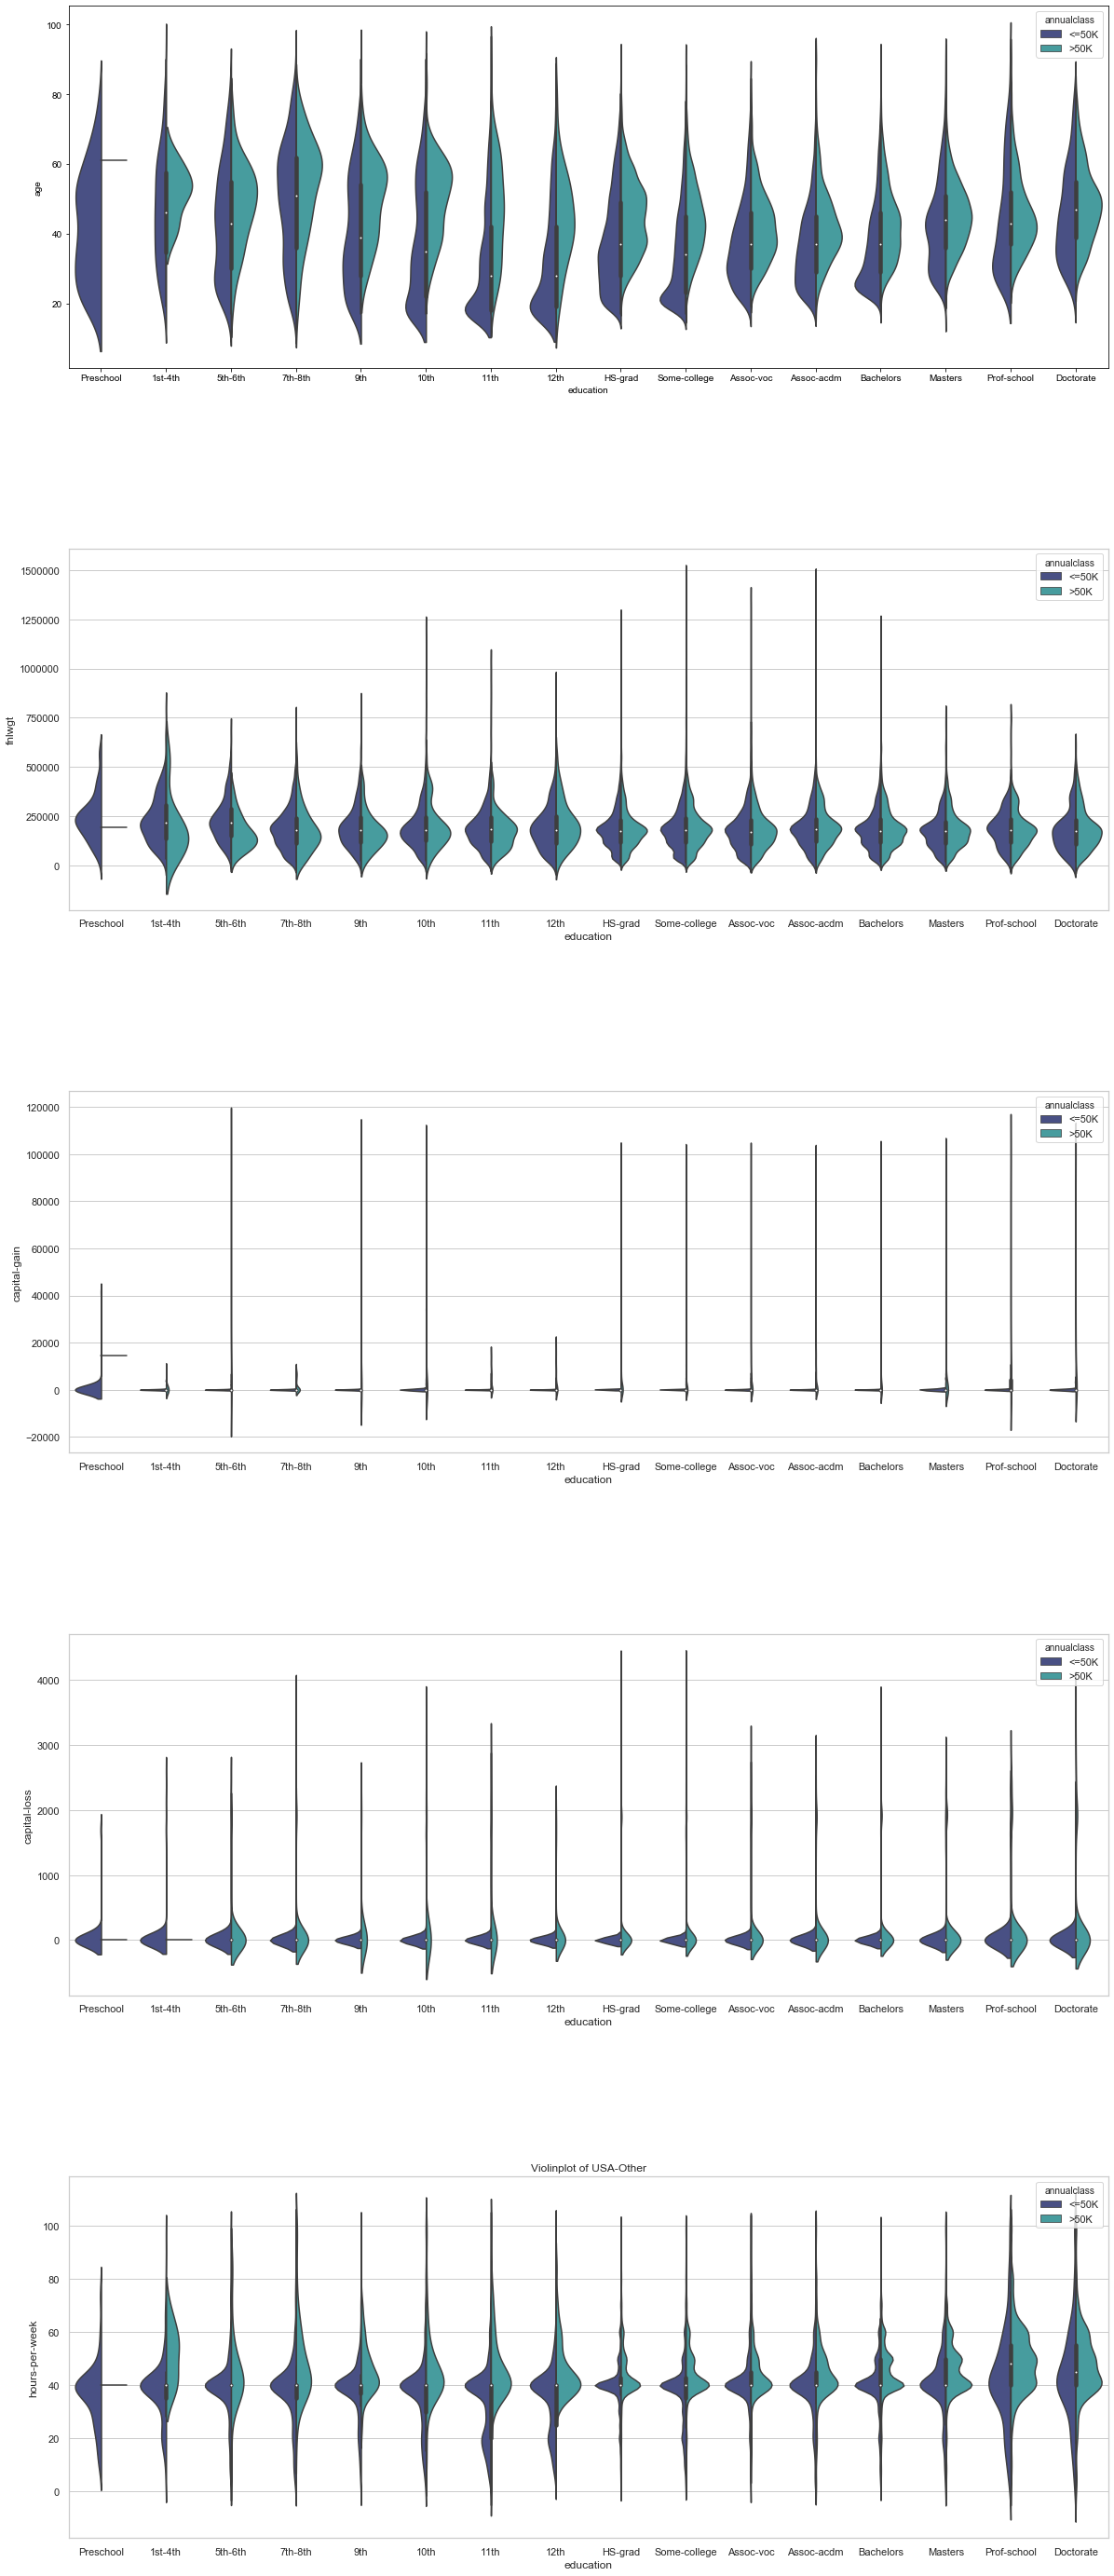

In [6]:
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='education', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True, 
                   order=['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Some-college',
                          'Assoc-voc', 'Assoc-acdm','Bachelors', 'Masters', 'Prof-school', 'Doctorate'])
plt.title('Violinplot of {}'.format(cats))
plt.show()

### Education VS Continuous Variables
- As education level increases the spread of fnlwgt remains constant, the range spikes for those with education between HS graduate, and Bachelors. 
- Extreme education levels have a fnlwgt spread like those with educations between preschool and 9th.
- All education levels apart from Preschool report some people making over 50K yearly.
- As education levels increases the minimum age increases.
- Most people report Capital gain around 0 regardless of education level.
- Most people report Capital loss around 0 regardless of education level.


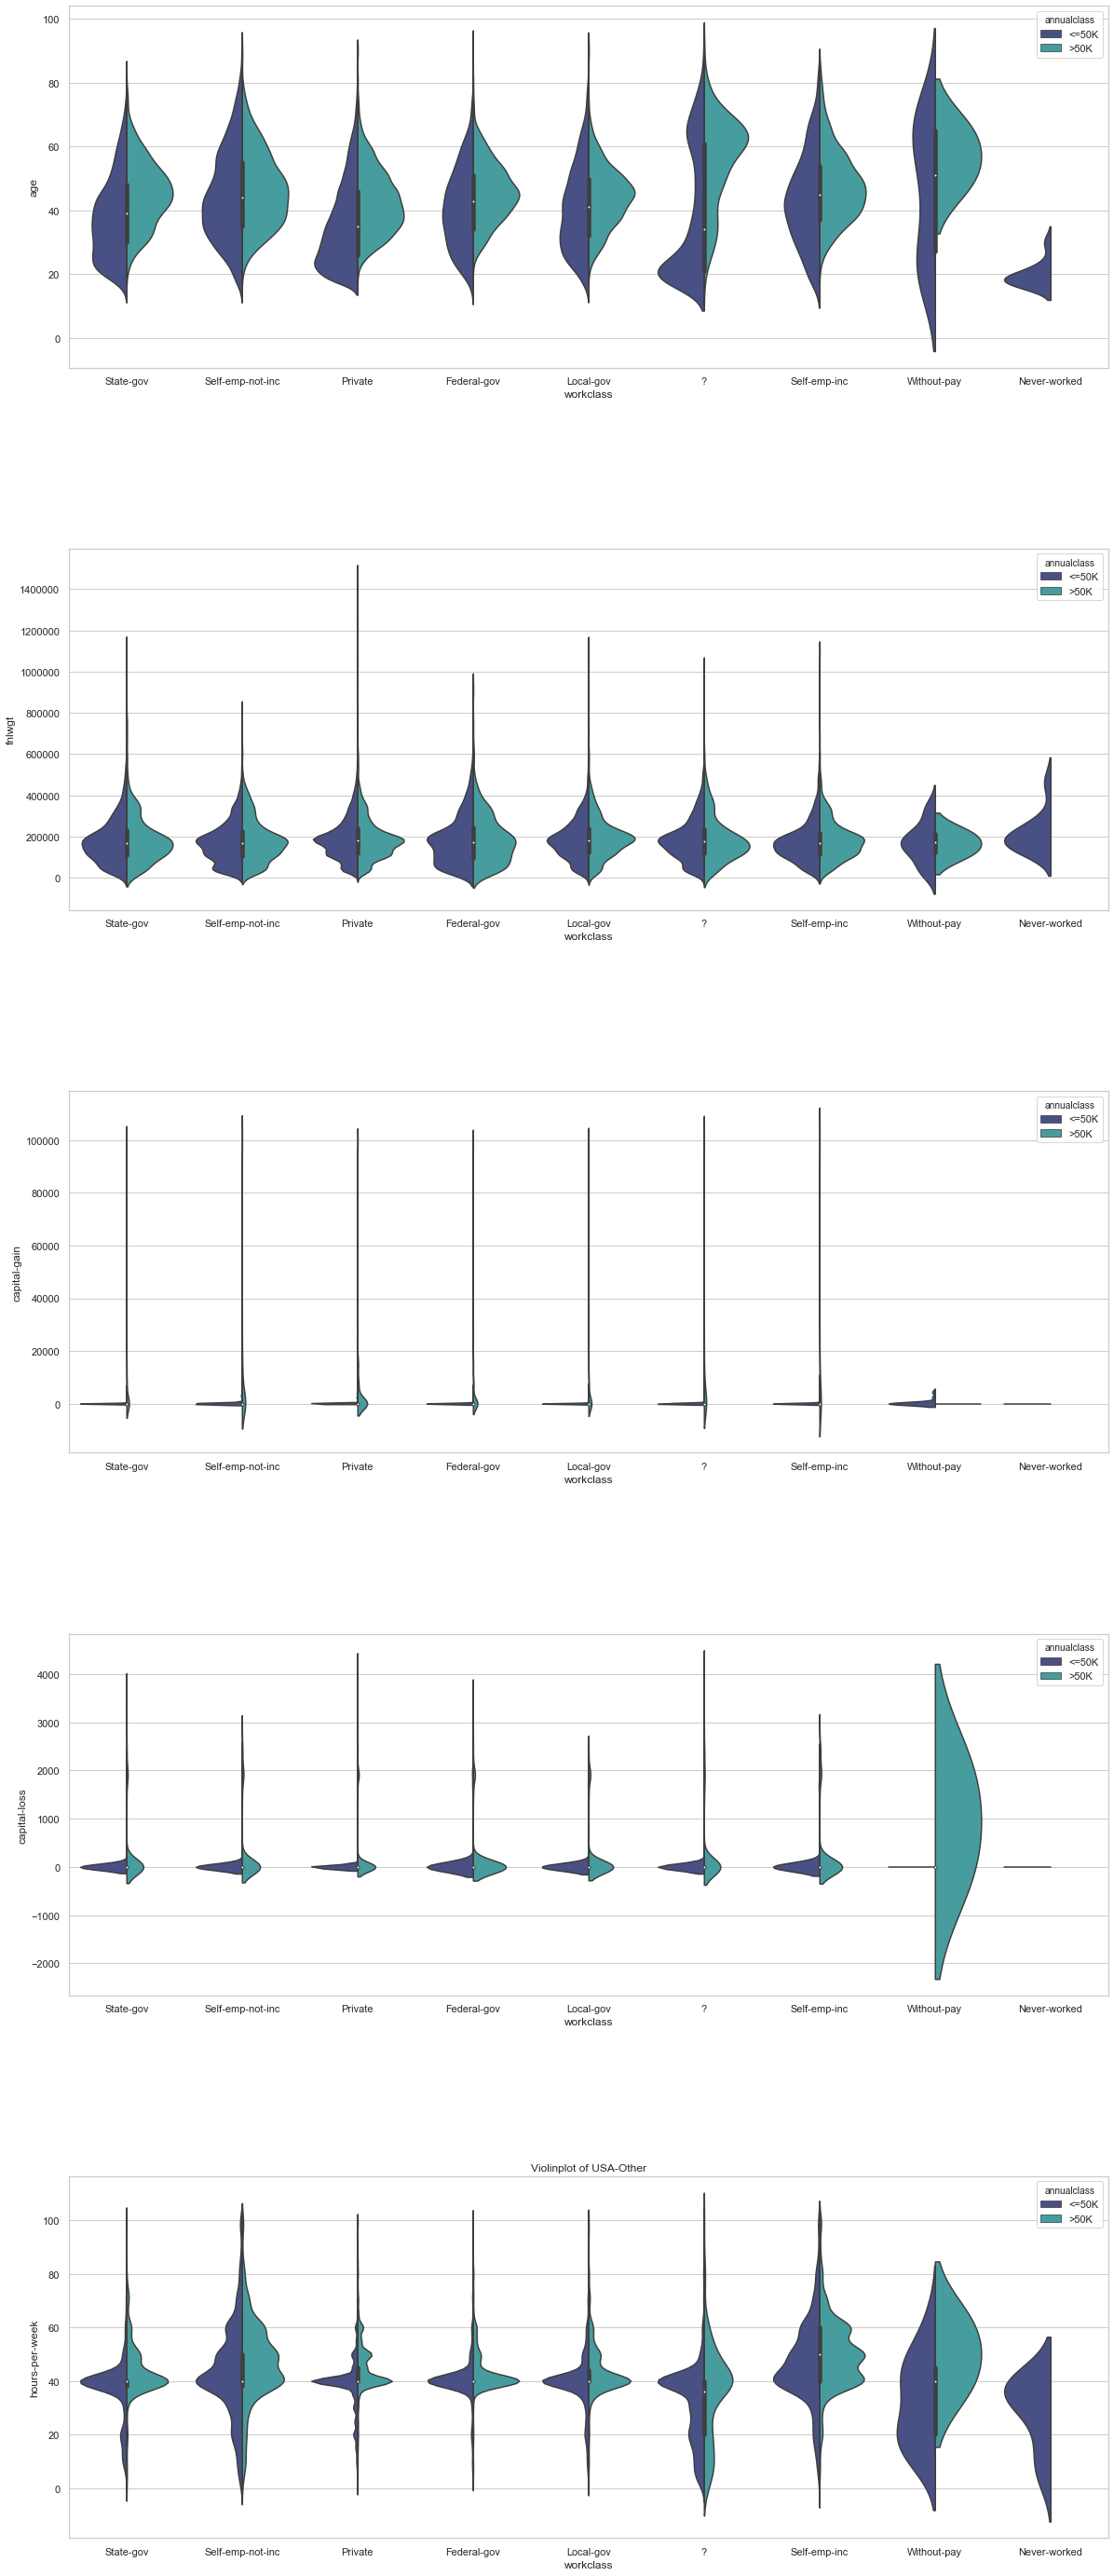

In [7]:
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='workclass', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True)
plt.title('Violinplot of {}'.format(cats))
plt.show()

### Work class Vs Continuous Variables
- All work classes apart from never worked, report annual earnings over 50K.
- The majority of fnlwgt spread remains constant between all work classes.
- Most people report Capital gain around 0 regardless of work class.
- The spread of capital loss for those working without pay and earning over 50K annually runs from -2000 to 4000.
- Most of those working for State-gov and earning over 50K annually work between 35 and 60 hours weekly.
- Most of those working a private work class position and earning over 50K annually work between 35 and 60 hours weekly.
- Most of those working for local-gov and earning over 50K annually work between 35 and 60 hours weekly.
- Most of those who are self-employed and earning over 50K annually work between 35 and 80 hours weekly.
- Most of those who work without pay and make over 50K annually, work between 20 and 80 hours weekly.
- For those who make less than 50K annually, most work around 40 hours a week.


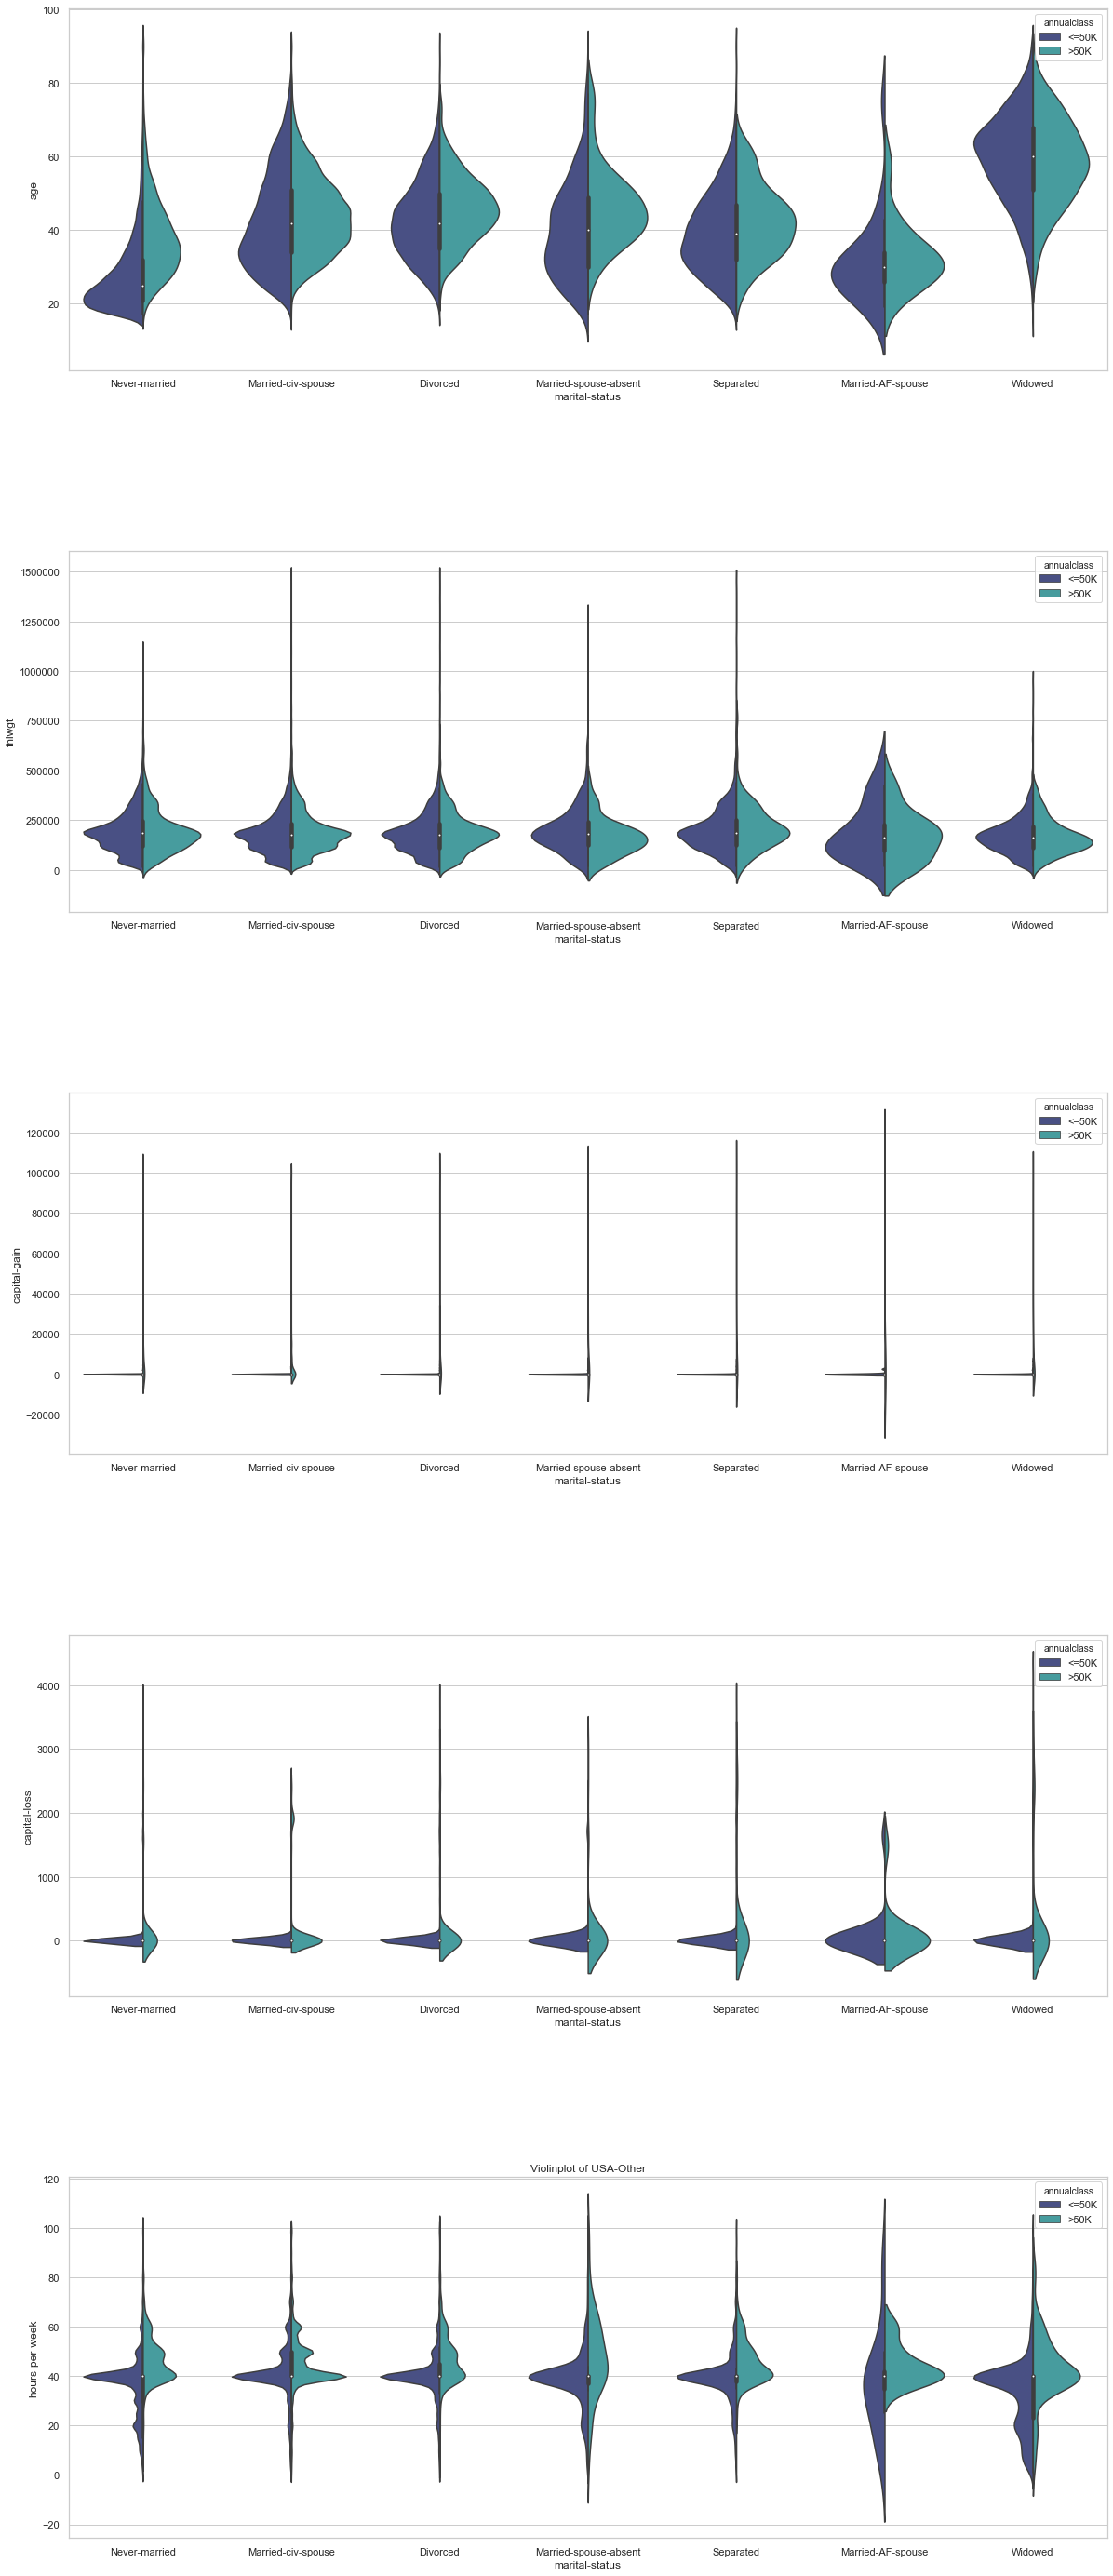

In [8]:
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='marital-status', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True)
plt.title('Violinplot of {}'.format(cats))
plt.show()

### Marital-Status Vs Continuous Variables
- The age range for never married, making less than 50K starts at a lower age than the range for those never married and making over 50K. Implying that as people age they are more likely to break the 50K mark.
    - This pattern continues for all marital statuses apart from Widowed.
- The majority of fnlwgt spread remains constant between all marital statuses.
- Most people report Capital gain around 0 regardless of marital status.
- Ranges for capital loss spike to at or over 4000 for those never married, divorced, separated, or widowed.
- The marital statuses with the narrowest ranges for capital loss spikes are Married civ spouse and married AF spouse.
- All marital statuses have peaks showing 40 hours per week worked regardless of annual class.
- Graphs for those earning over 50K annually show most work over 40 hours.
- Graphs for those earning less than 50K annually show most work at or below 40 hours weekly.


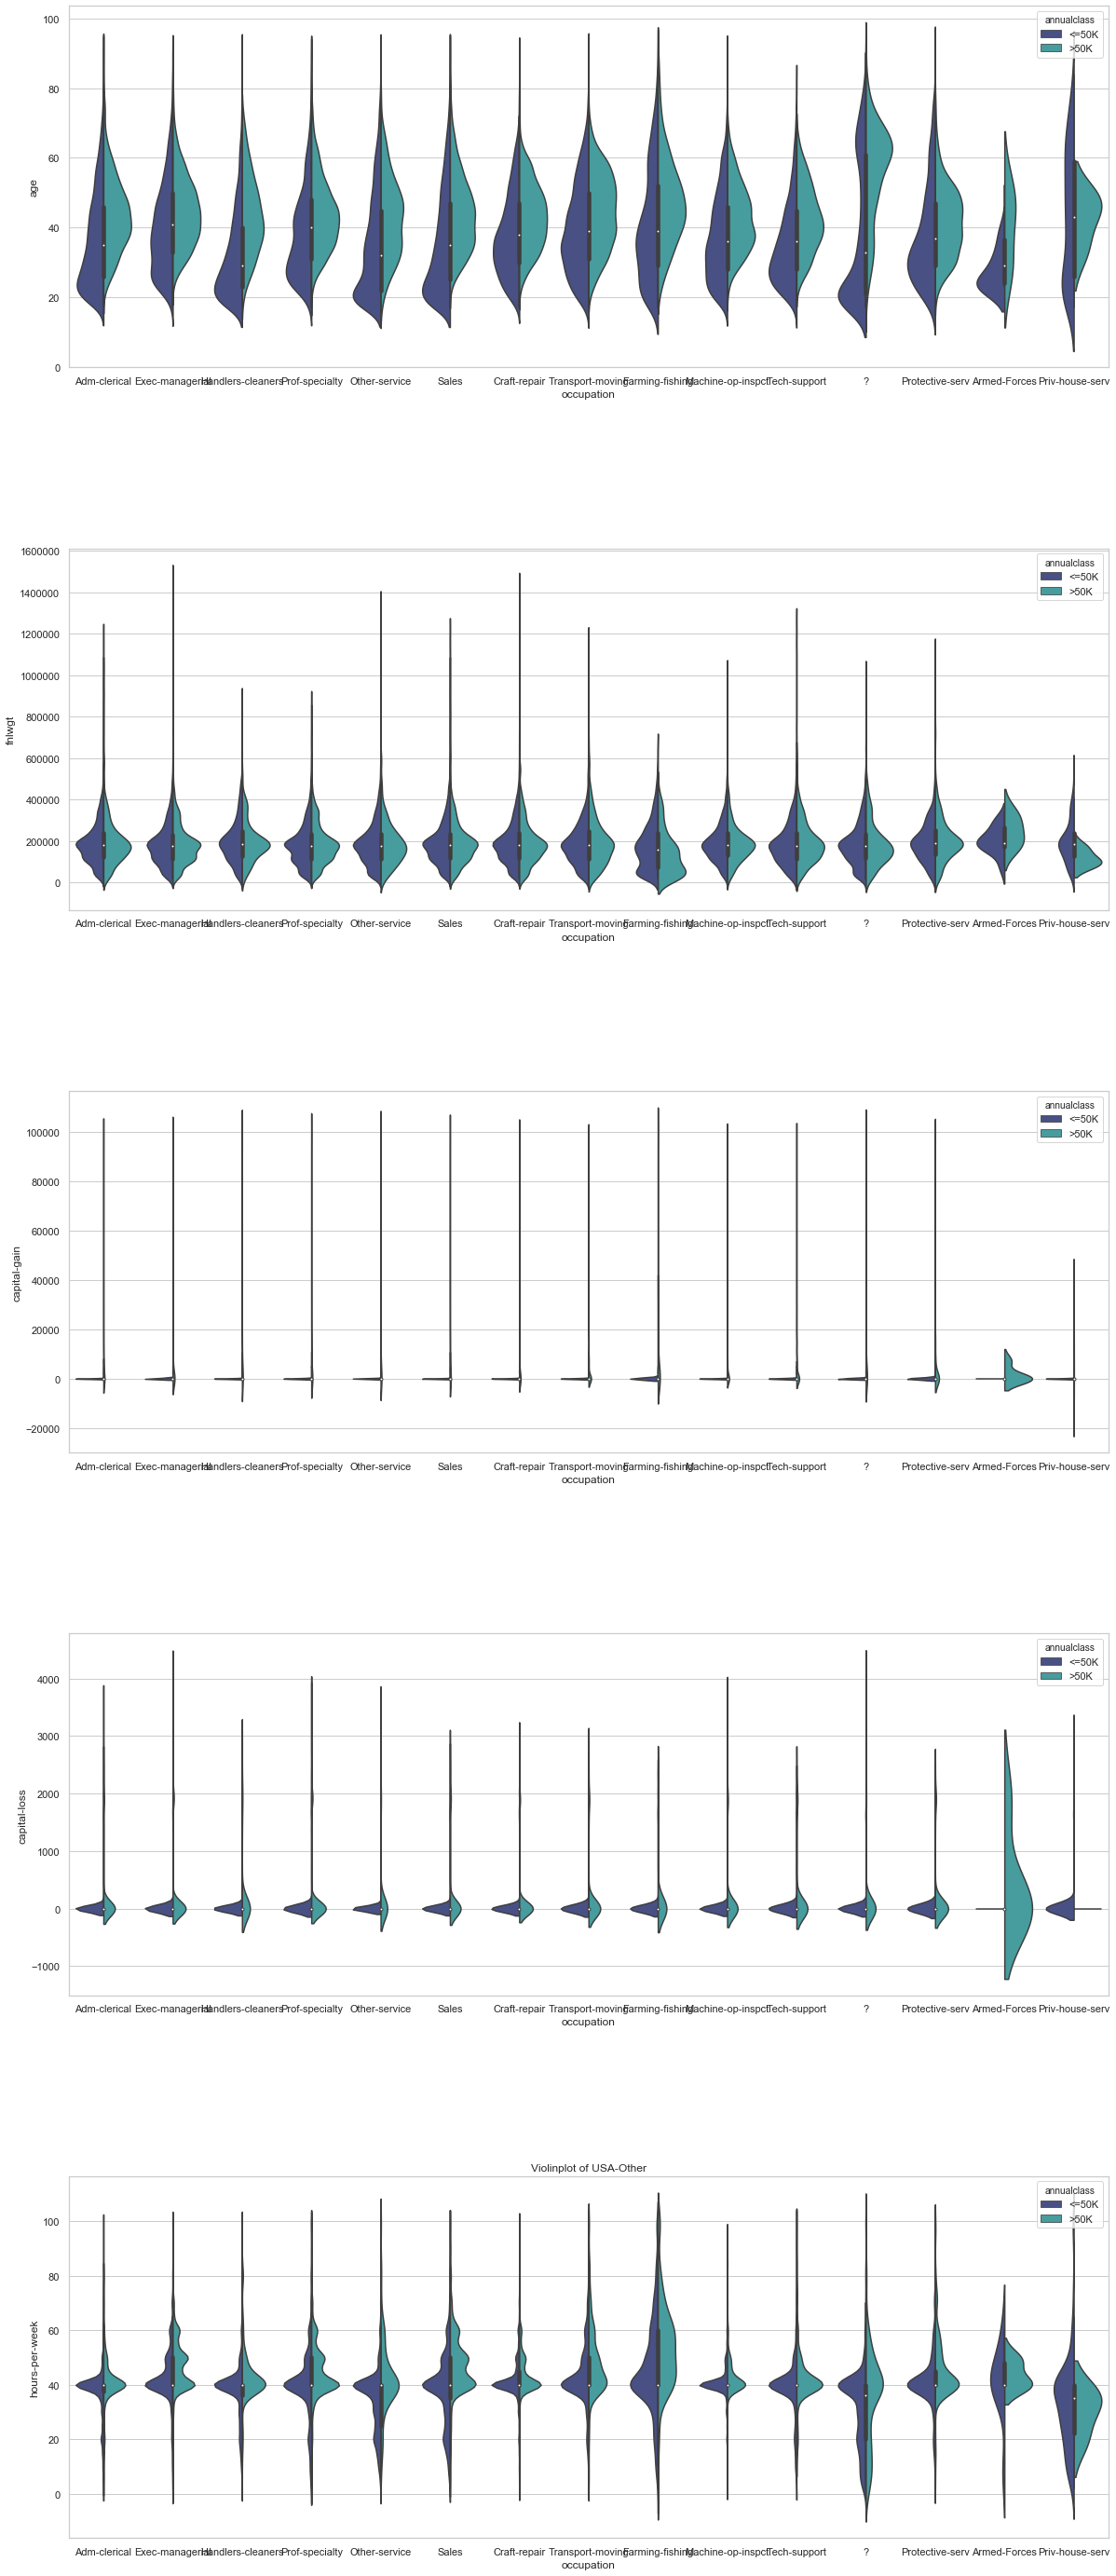

In [9]:
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='occupation', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True)
plt.title('Violinplot of {}'.format(cats))
plt.show()

### Occupation VS Continuous Variables
- Violin plots for “?” occupation peak just above age 60 regardless of annual class.
- Violin plots for “?” occupation peak around 20 for those who earn below 50K annually.
- The majority of fnlwgt spread remains constant between all occupations.
- Most people report capital gain around 0 regardless of occupation.
- Exec-Managerial, Prof-specialty, Sales, Transportation-moving, Farming-fishing, and Protective services reflect most people in these occupations who earn over 50K work tend to work extended hours.
    - All other occupations for those who earn over 50K are more centered around 40 hours per week.
        - Except for the ? occupation and Private house services


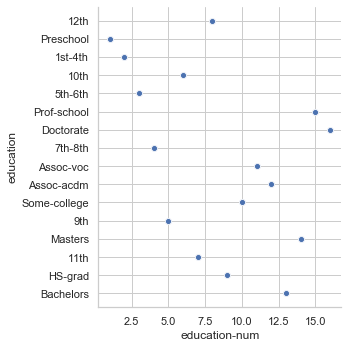

In [10]:
sns.relplot(x='education-num',y='education', data=fulldata, palette = "mako")

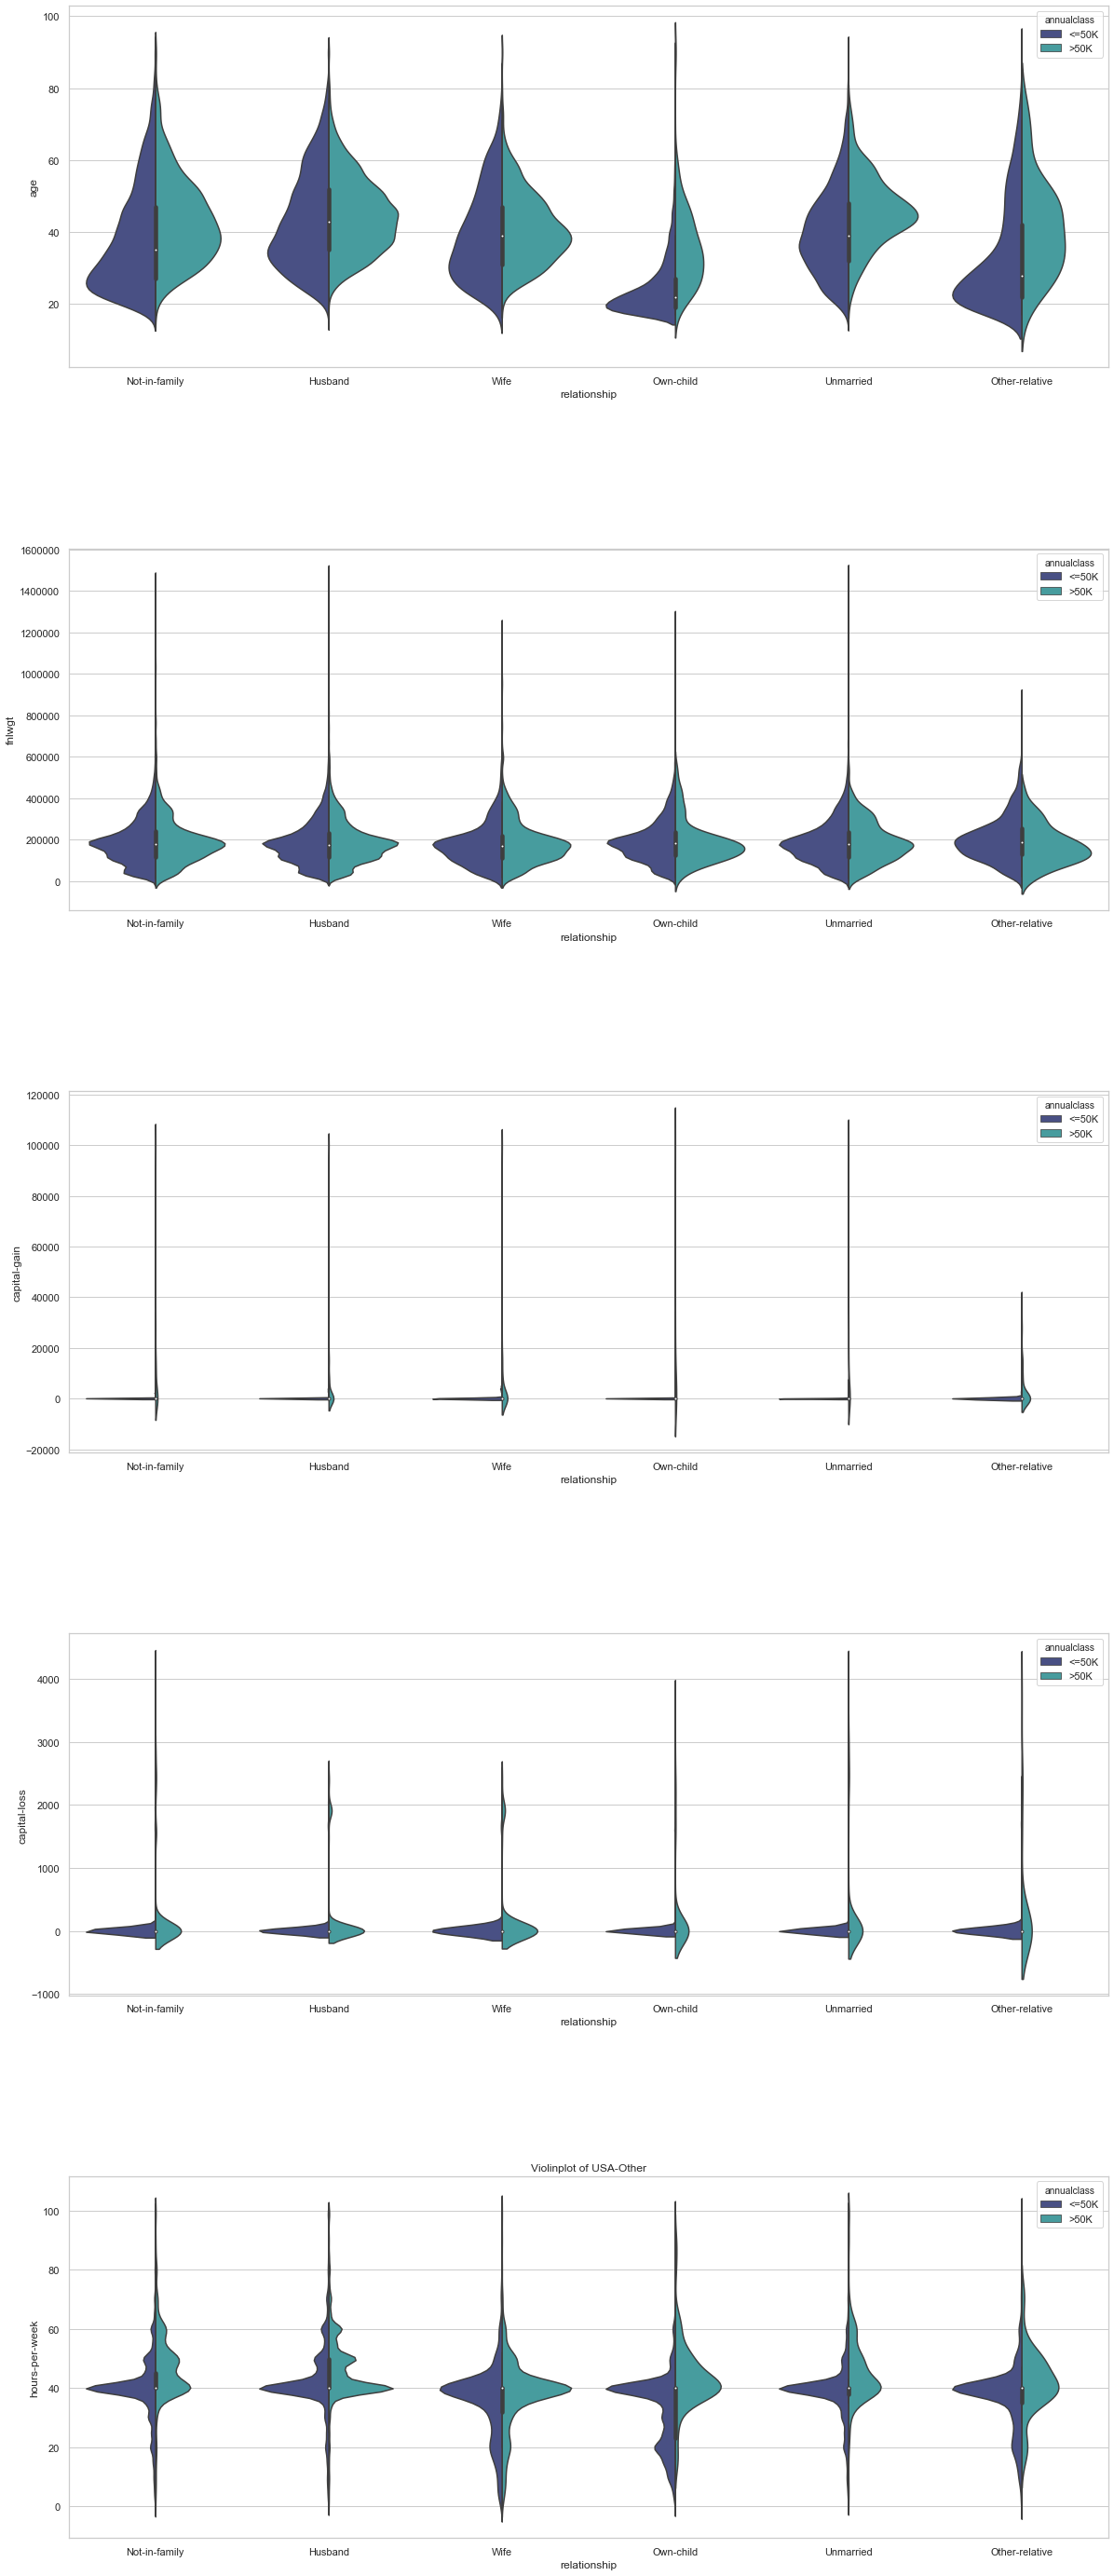

In [11]:
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='relationship', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True)
plt.title('Violinplot of {}'.format(cats))
plt.show()

### Relationships VS Continuous Variables
- Those who are not in family, husbands, and wives who make below 50K yearly, age peaks around 25 and 35.
- Those who are not in family, husbands, and wives who make over 50K yearly, age peaks closer to 40.
- Only children who make below 50K age peaks around 20.
- Only children who make over 50K age peaks around 25.
- Unmarried making below 50K have an age peak just under 40.
- Unmarried making over 50K have an age peak just over 40.
- The majority of fnlwgt spread remains constant between all relationships.
- Most people report capital gain around 0 regardless of relationship.
- Most people report capital loss around 0 regardless of relationship.
- Those not in family, and husbands making over 50K tend to work longer hours.
- Husbands tend to work longer hours regardless of annual class.
- Wives tend to work closer to 40 hours with secondary peaks around 20 hours regardless of annual class.
- Own-children earning below 50K work closer to 40 hours with a secondary peak around 20 hours .
- Own-children earning over 50K work closer to 40 hours or longer hours.

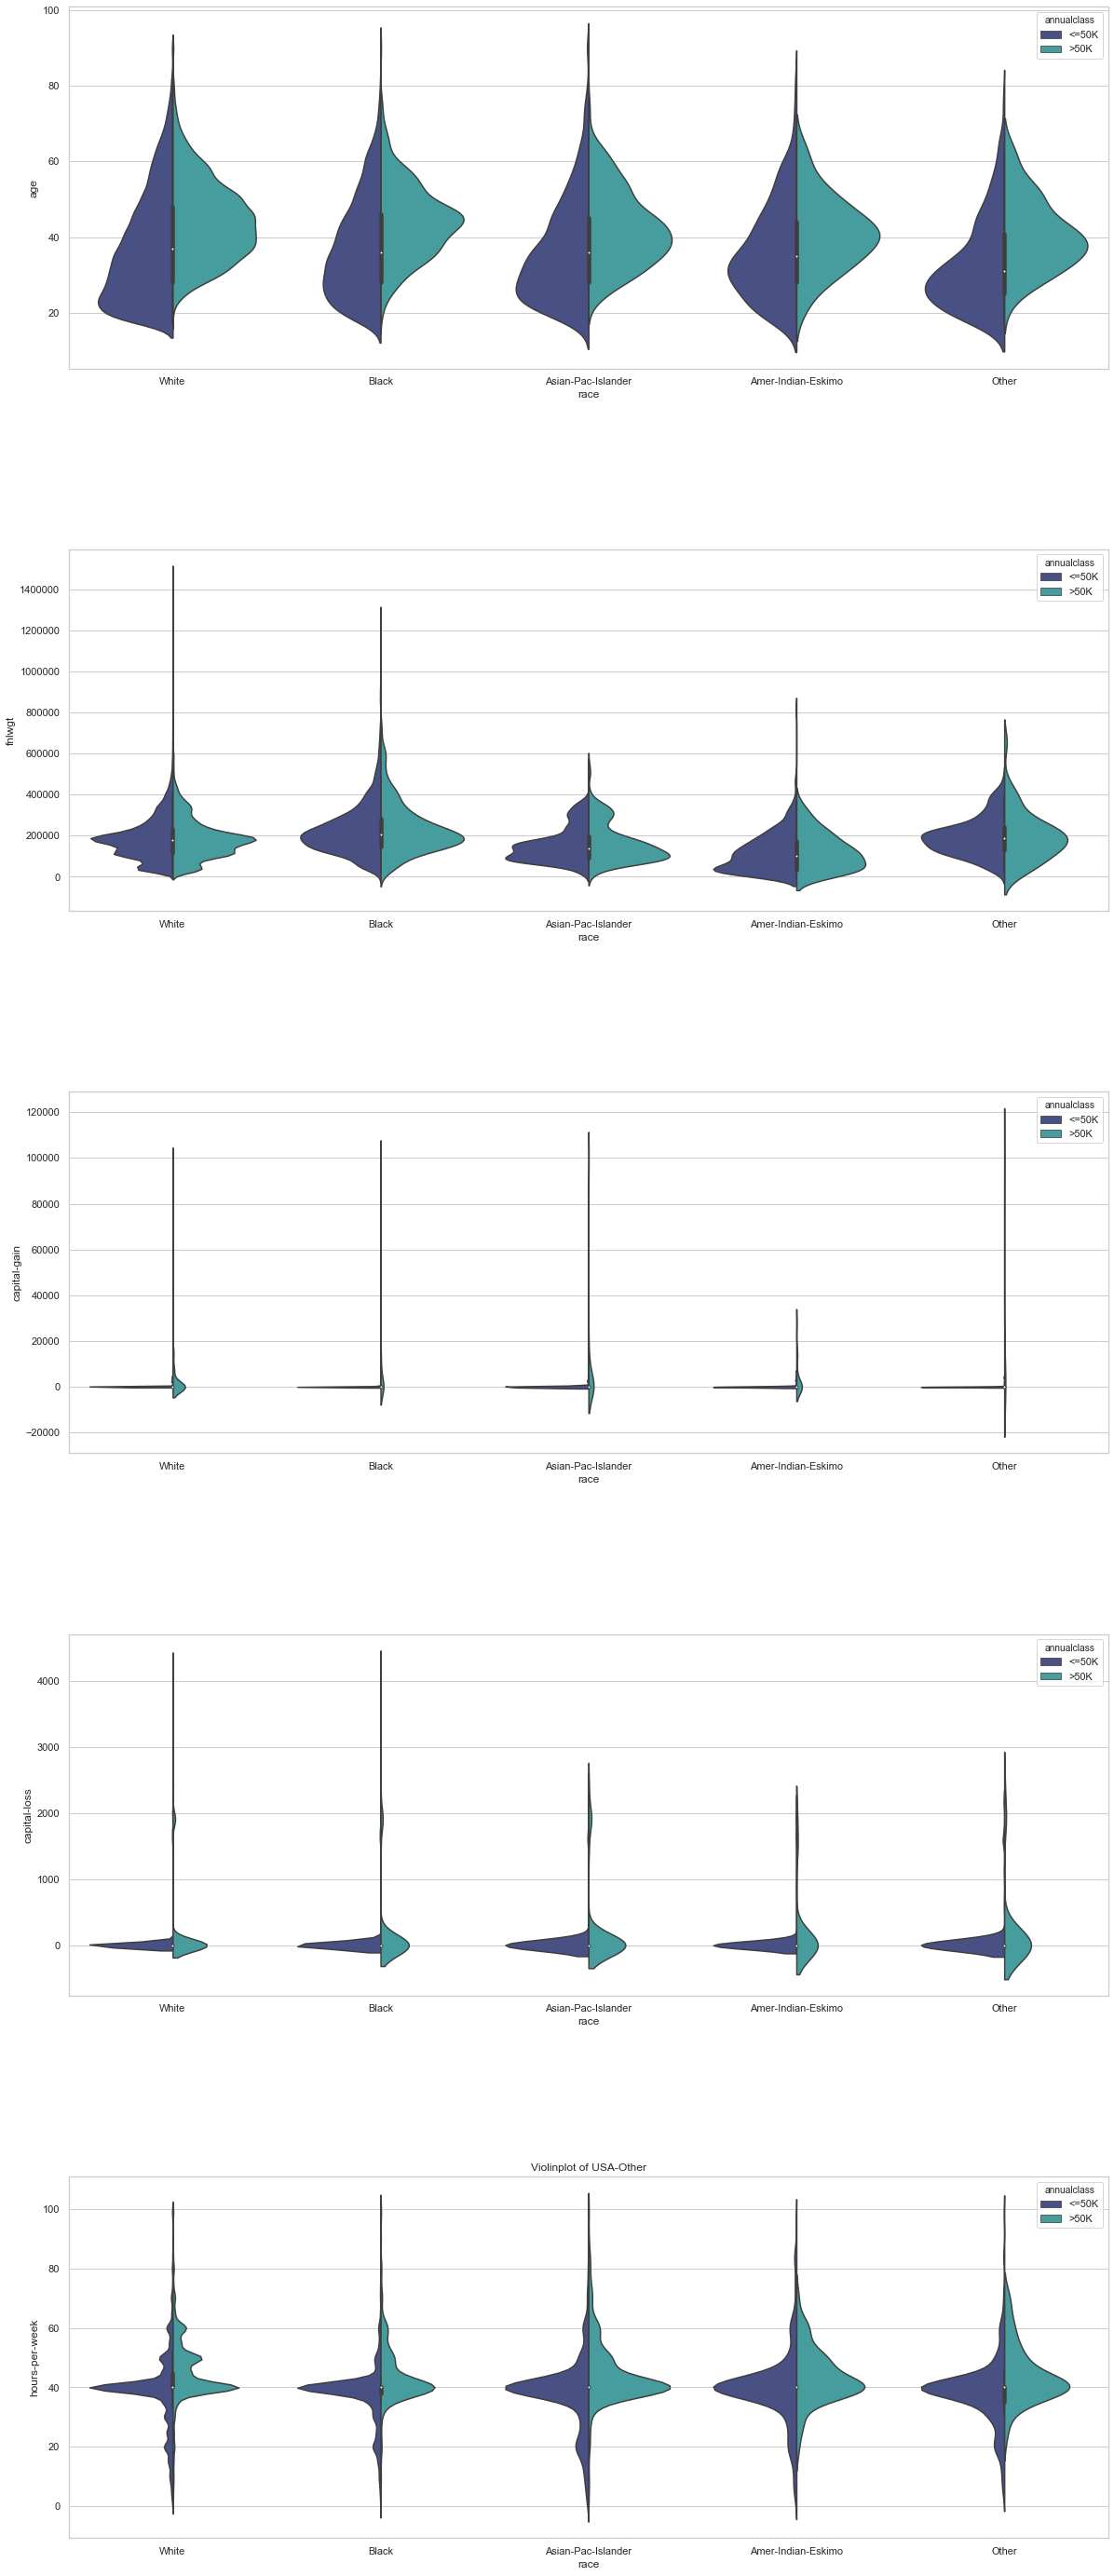

In [12]:
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='race', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True)
plt.title('Violinplot of {}'.format(cats))
plt.show()

### Race VS Continuous Variables
- All who make over 50K age peaks around 40 regardless of race.
- All who make below 50K age peaks between 20 and 35.
- Black people have a larger fnlwgt range than other races regardless of annual class.
- Most people report capital gain around 0 regardless of race.
- Most people report capital loss around 0 regardless of race.
- American Pacific Islander, American Indian Eskimo, and other tend to work longer hours than White and black races for those making over 50K.
- Regardless of annual class and race the most common hours per week value was 40.

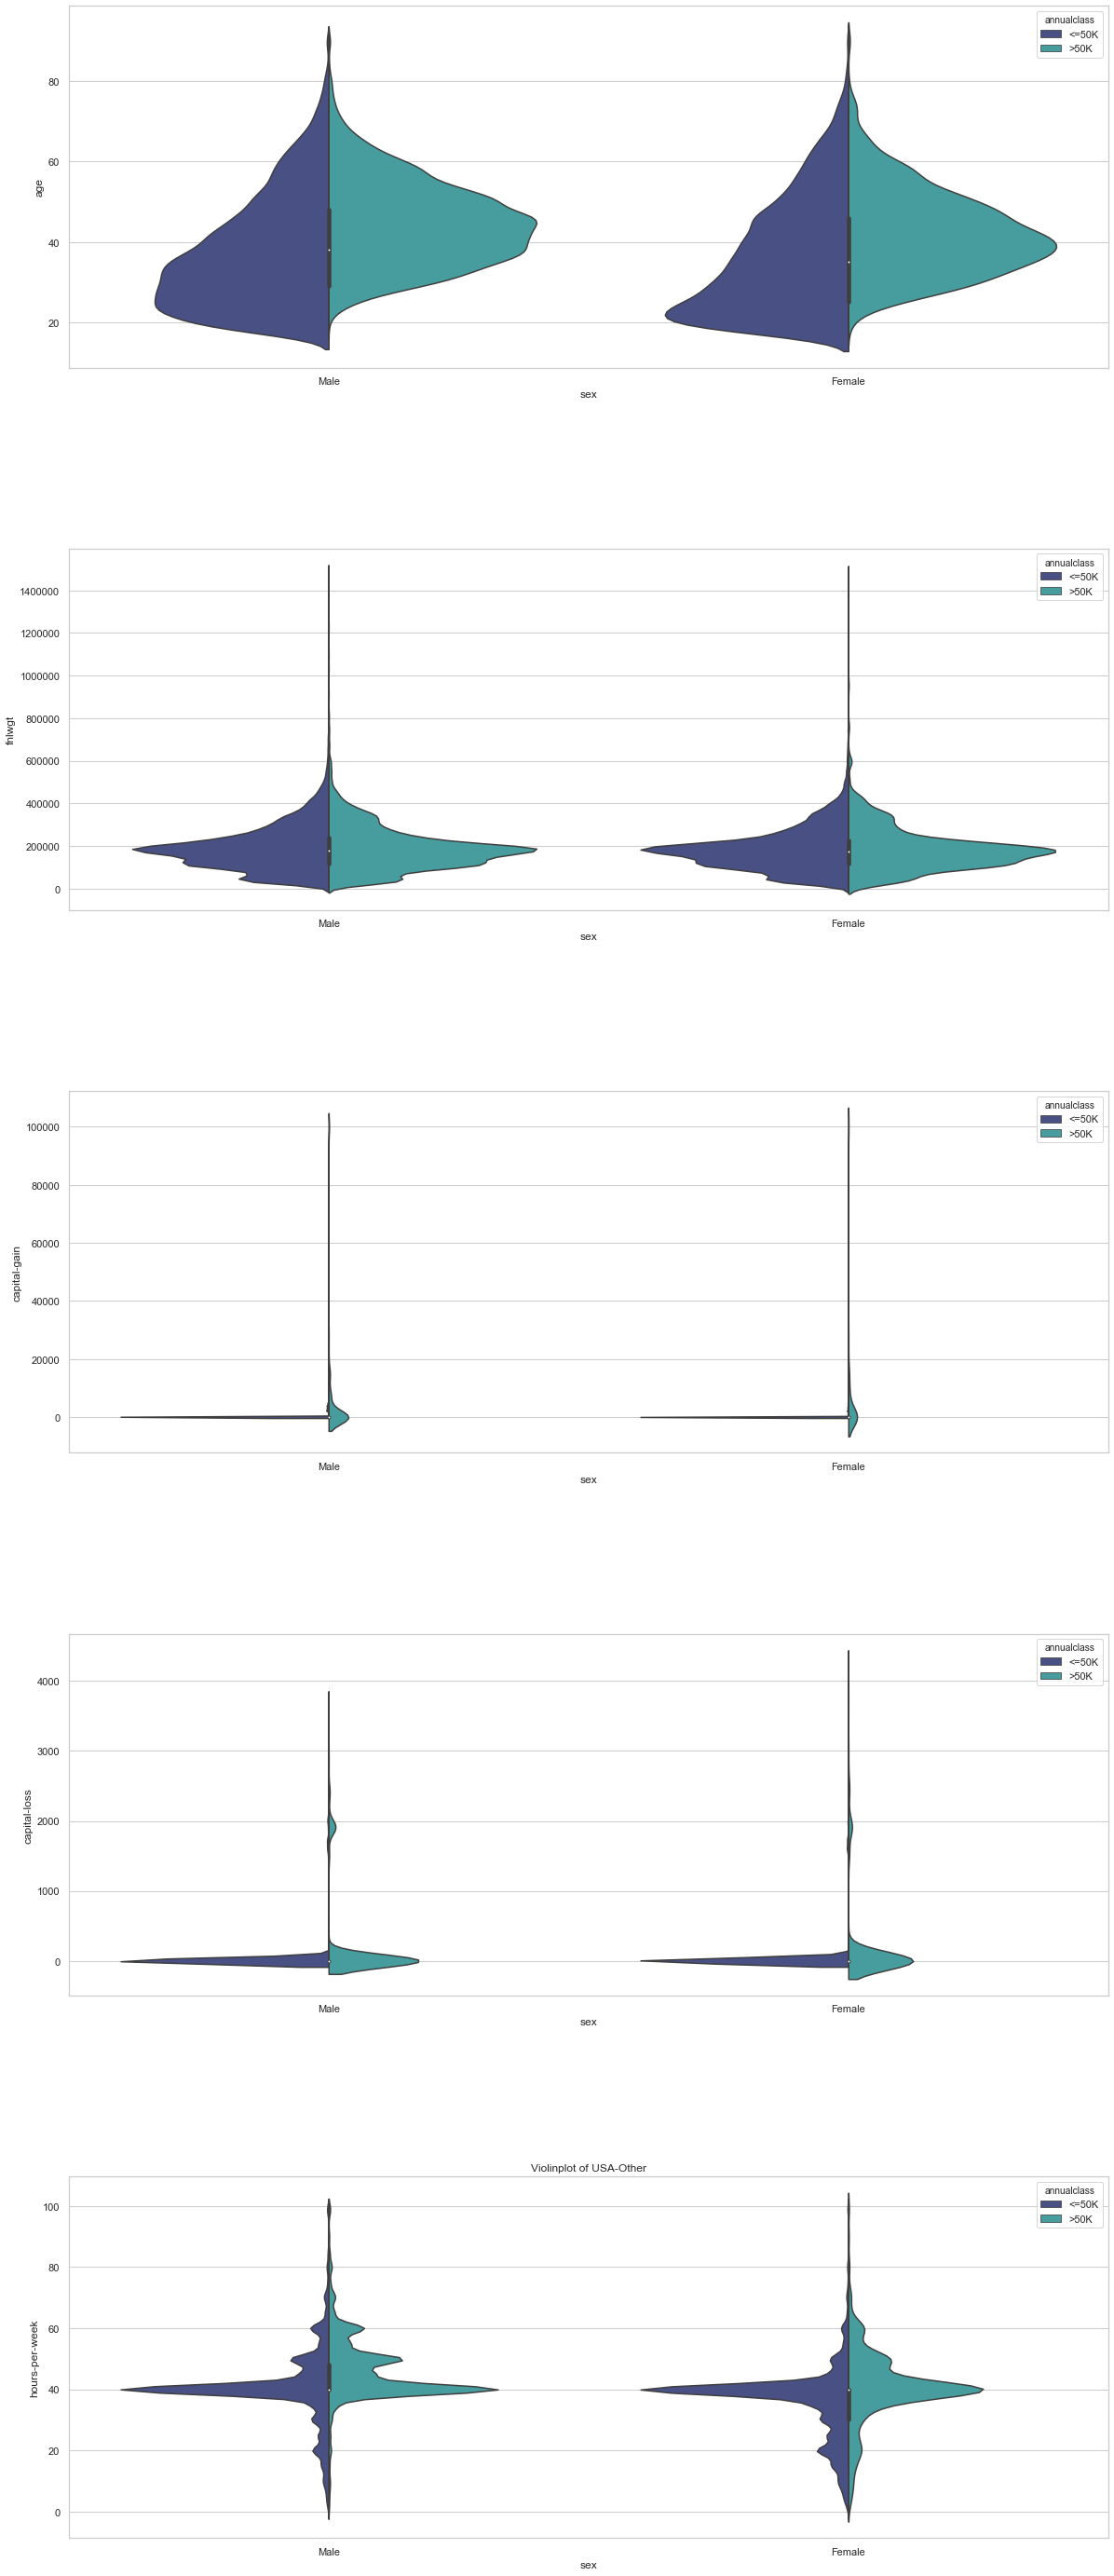

In [13]:
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='sex', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True)
plt.title('Violinplot of {}'.format(cats))
plt.show()

### Sex Vs Continuous Variables
- Age peaks for those earning over 50K around 40 for women and just over 40 for men.
- Age peaks for those earning below 50K around 20 for women and between 25 and 35 for men.
- Fnlwgt for those earning over 50K is the same regardless of gender.
- Fnlwgt for those earning below 50K is the same regardless of gender.
- Capital gain is mostly 0 with spikes around 100,000 dollars regardless of gender.
- Capital loss is mostly 0 with spikes around 2000 dollars regardless of gender.
- 	Most people report working 40 hours a week, women are more likely to work part time, regardless of annual class.
- Men and women earning over 50K tend to work more overtime.


### Native Country VS Continuous Variables
The following code blocks dive into global regions to relate similar native countries to each other.

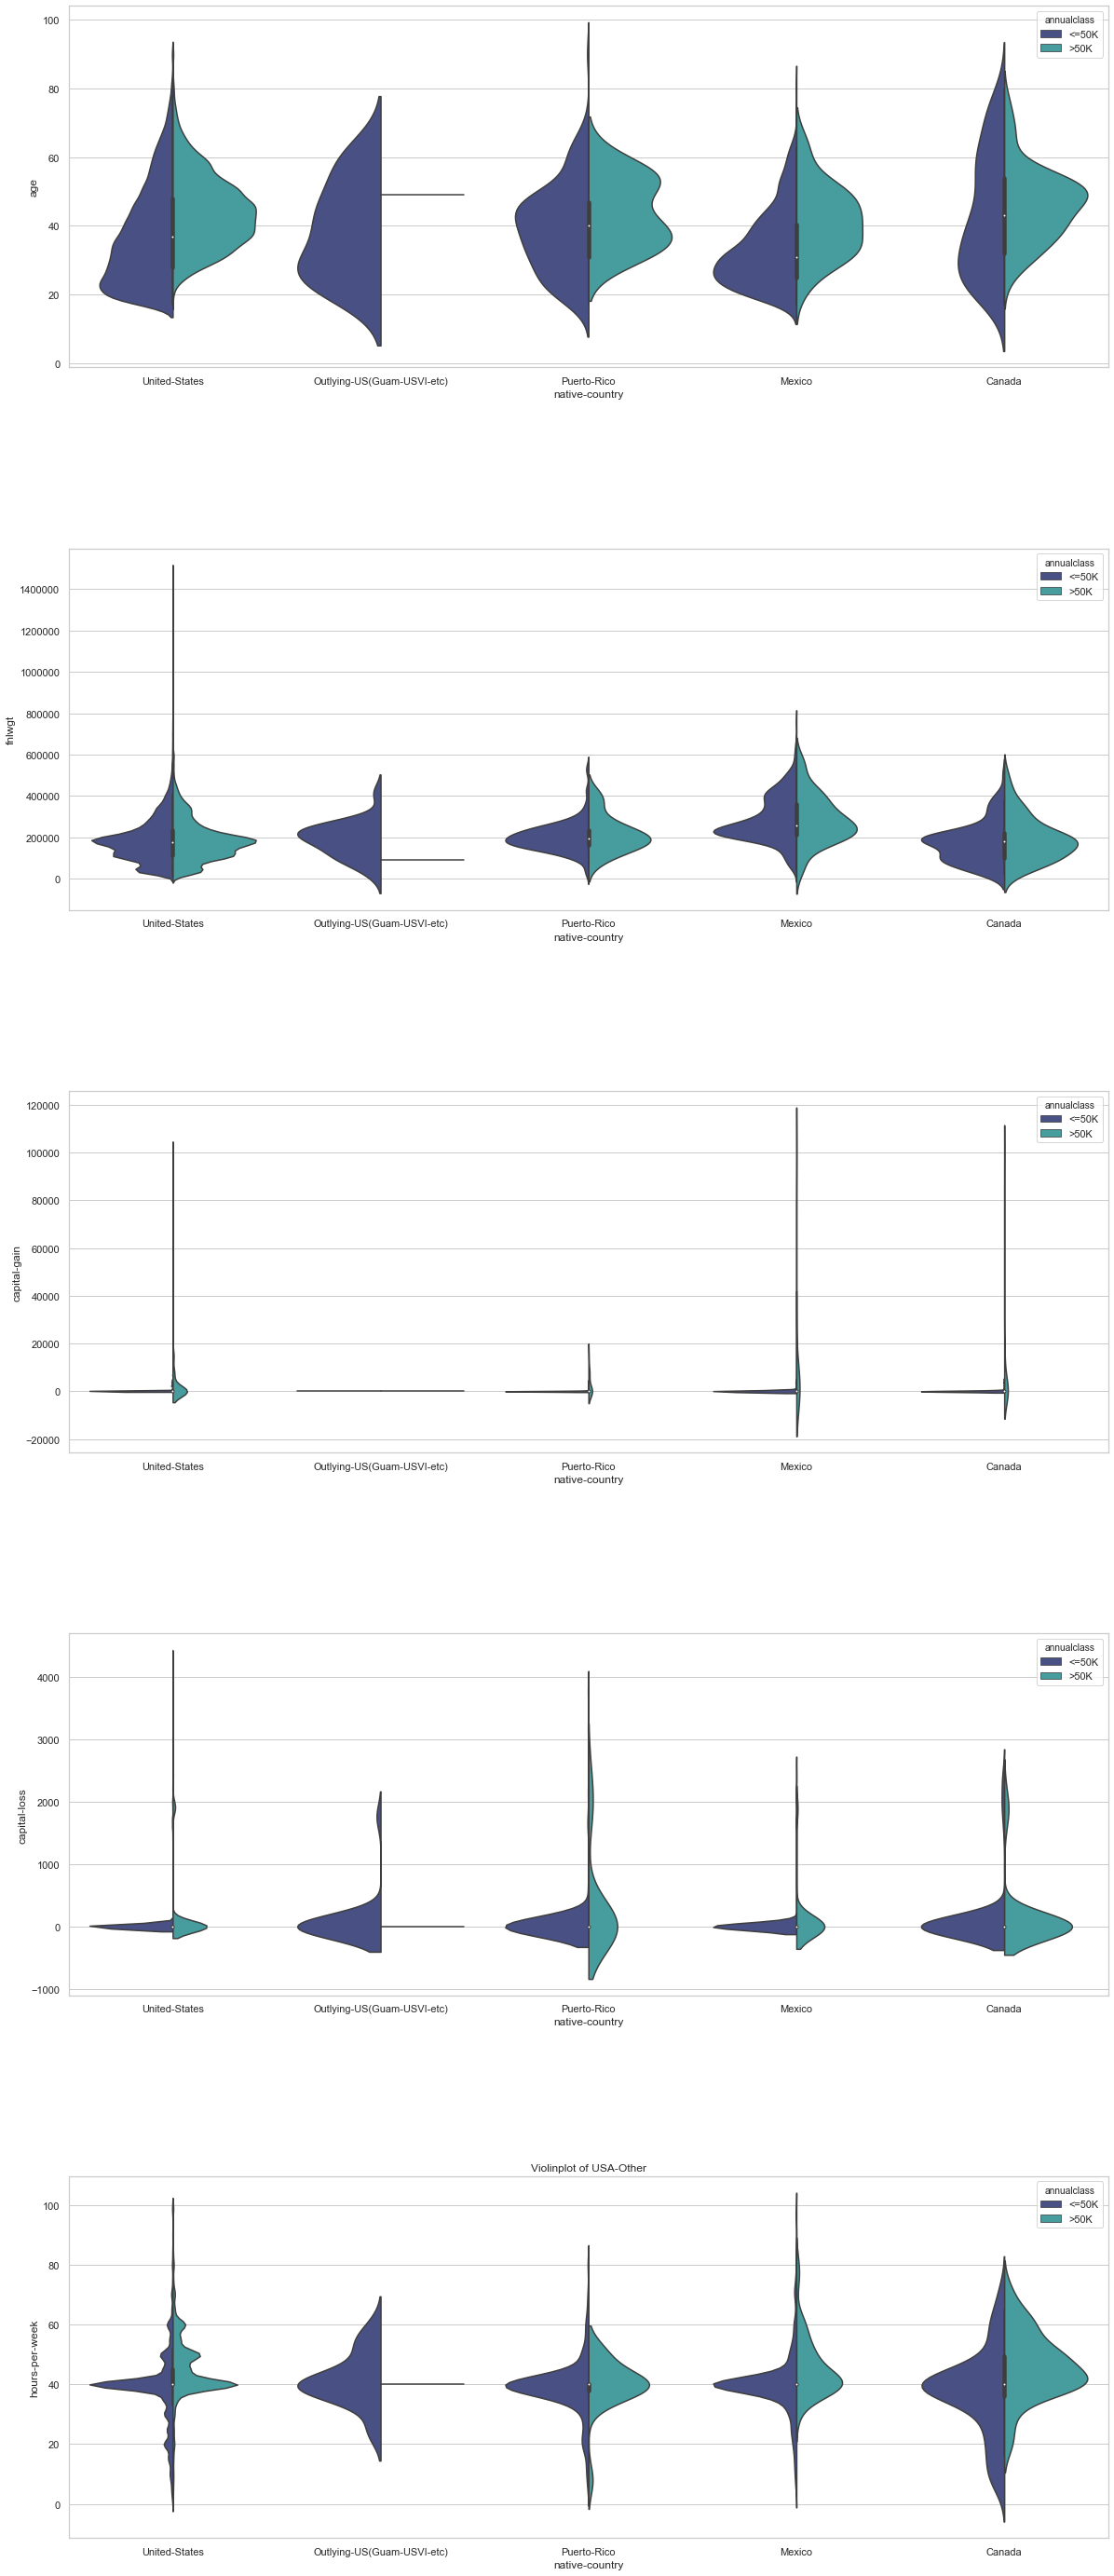

In [44]:
# Countries around the USA
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='native-country', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True, 
                   order=['United-States','Outlying-US(Guam-USVI-etc)','Puerto-Rico', 'Mexico','Canada'])

plt.title('Violinplot of {}'.format(cats))
plt.show()

#### North America
- Those making over 50K have age peaks around 40 for USA and Mexico, around 50 and 35 for Puerto Rico and around 50 for Canada.
- Outlying Territories report rare occurrences of people making over 50K.
- Those making over 50K tend to work longer hours in USA, Puerto-Rico, Mexico, and Canada.

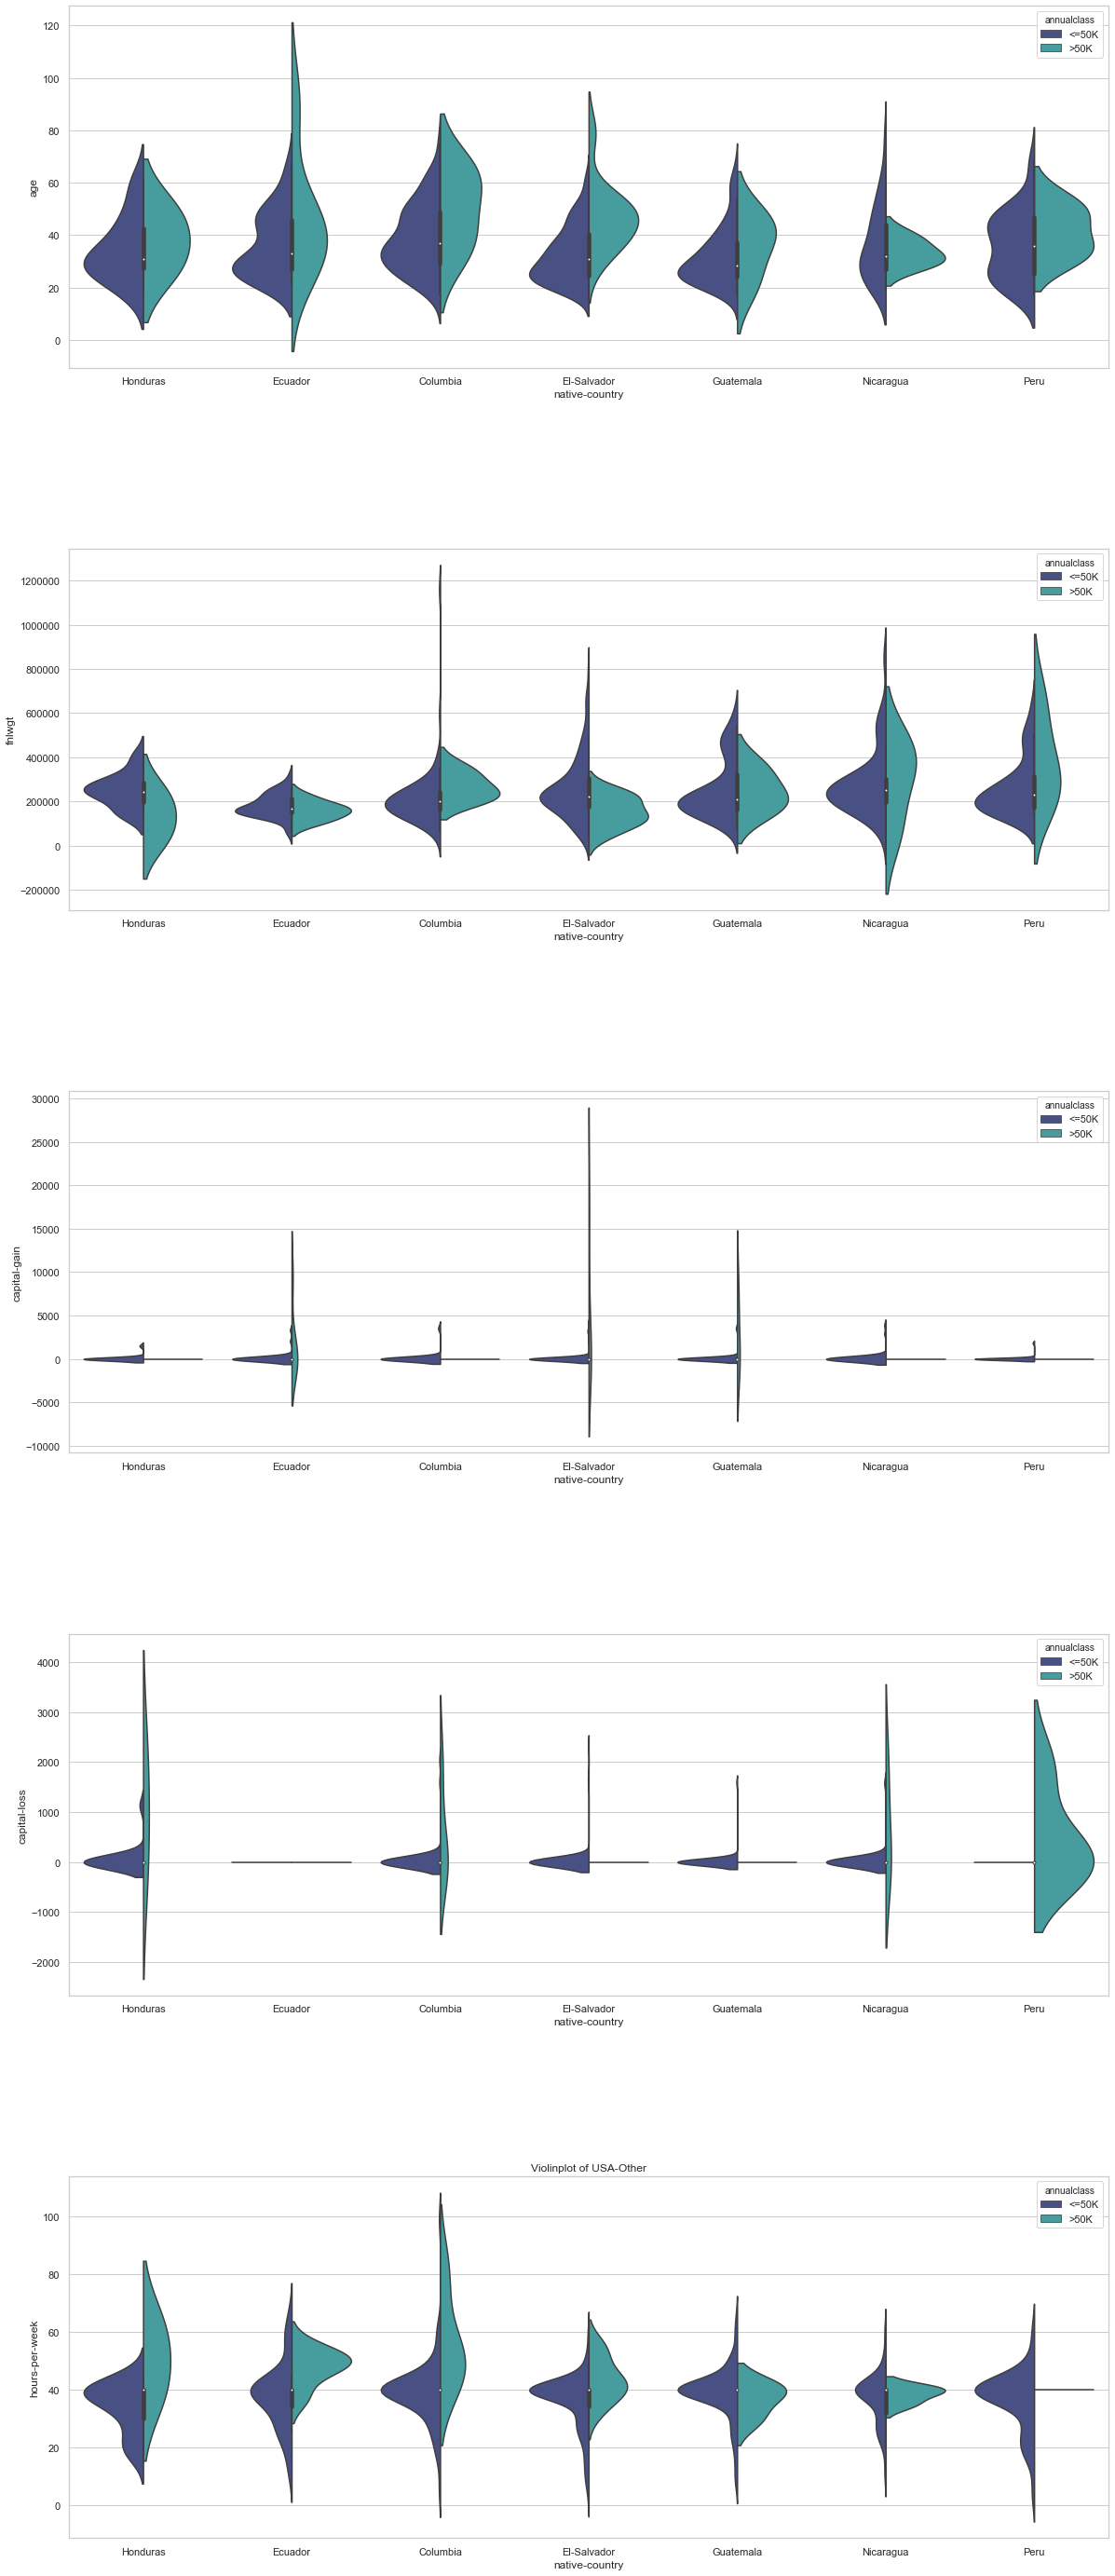

In [46]:
# Countries in Central America/South America
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='native-country', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True, 
                   order=['Honduras','Ecuador','Columbia','El-Salvador', 'Guatemala','Nicaragua','Peru'])

plt.title('Violinplot of {}'.format(cats))
plt.show()

#### Central America
- The age range for those making over 50K varies between countries in Central America.
- Fnlwgt range varies between countries in Central America.
- Hours worked per week tends to be closer to 40 hours with only Honduras and Columbia reporting extended hours for the over 50K class.

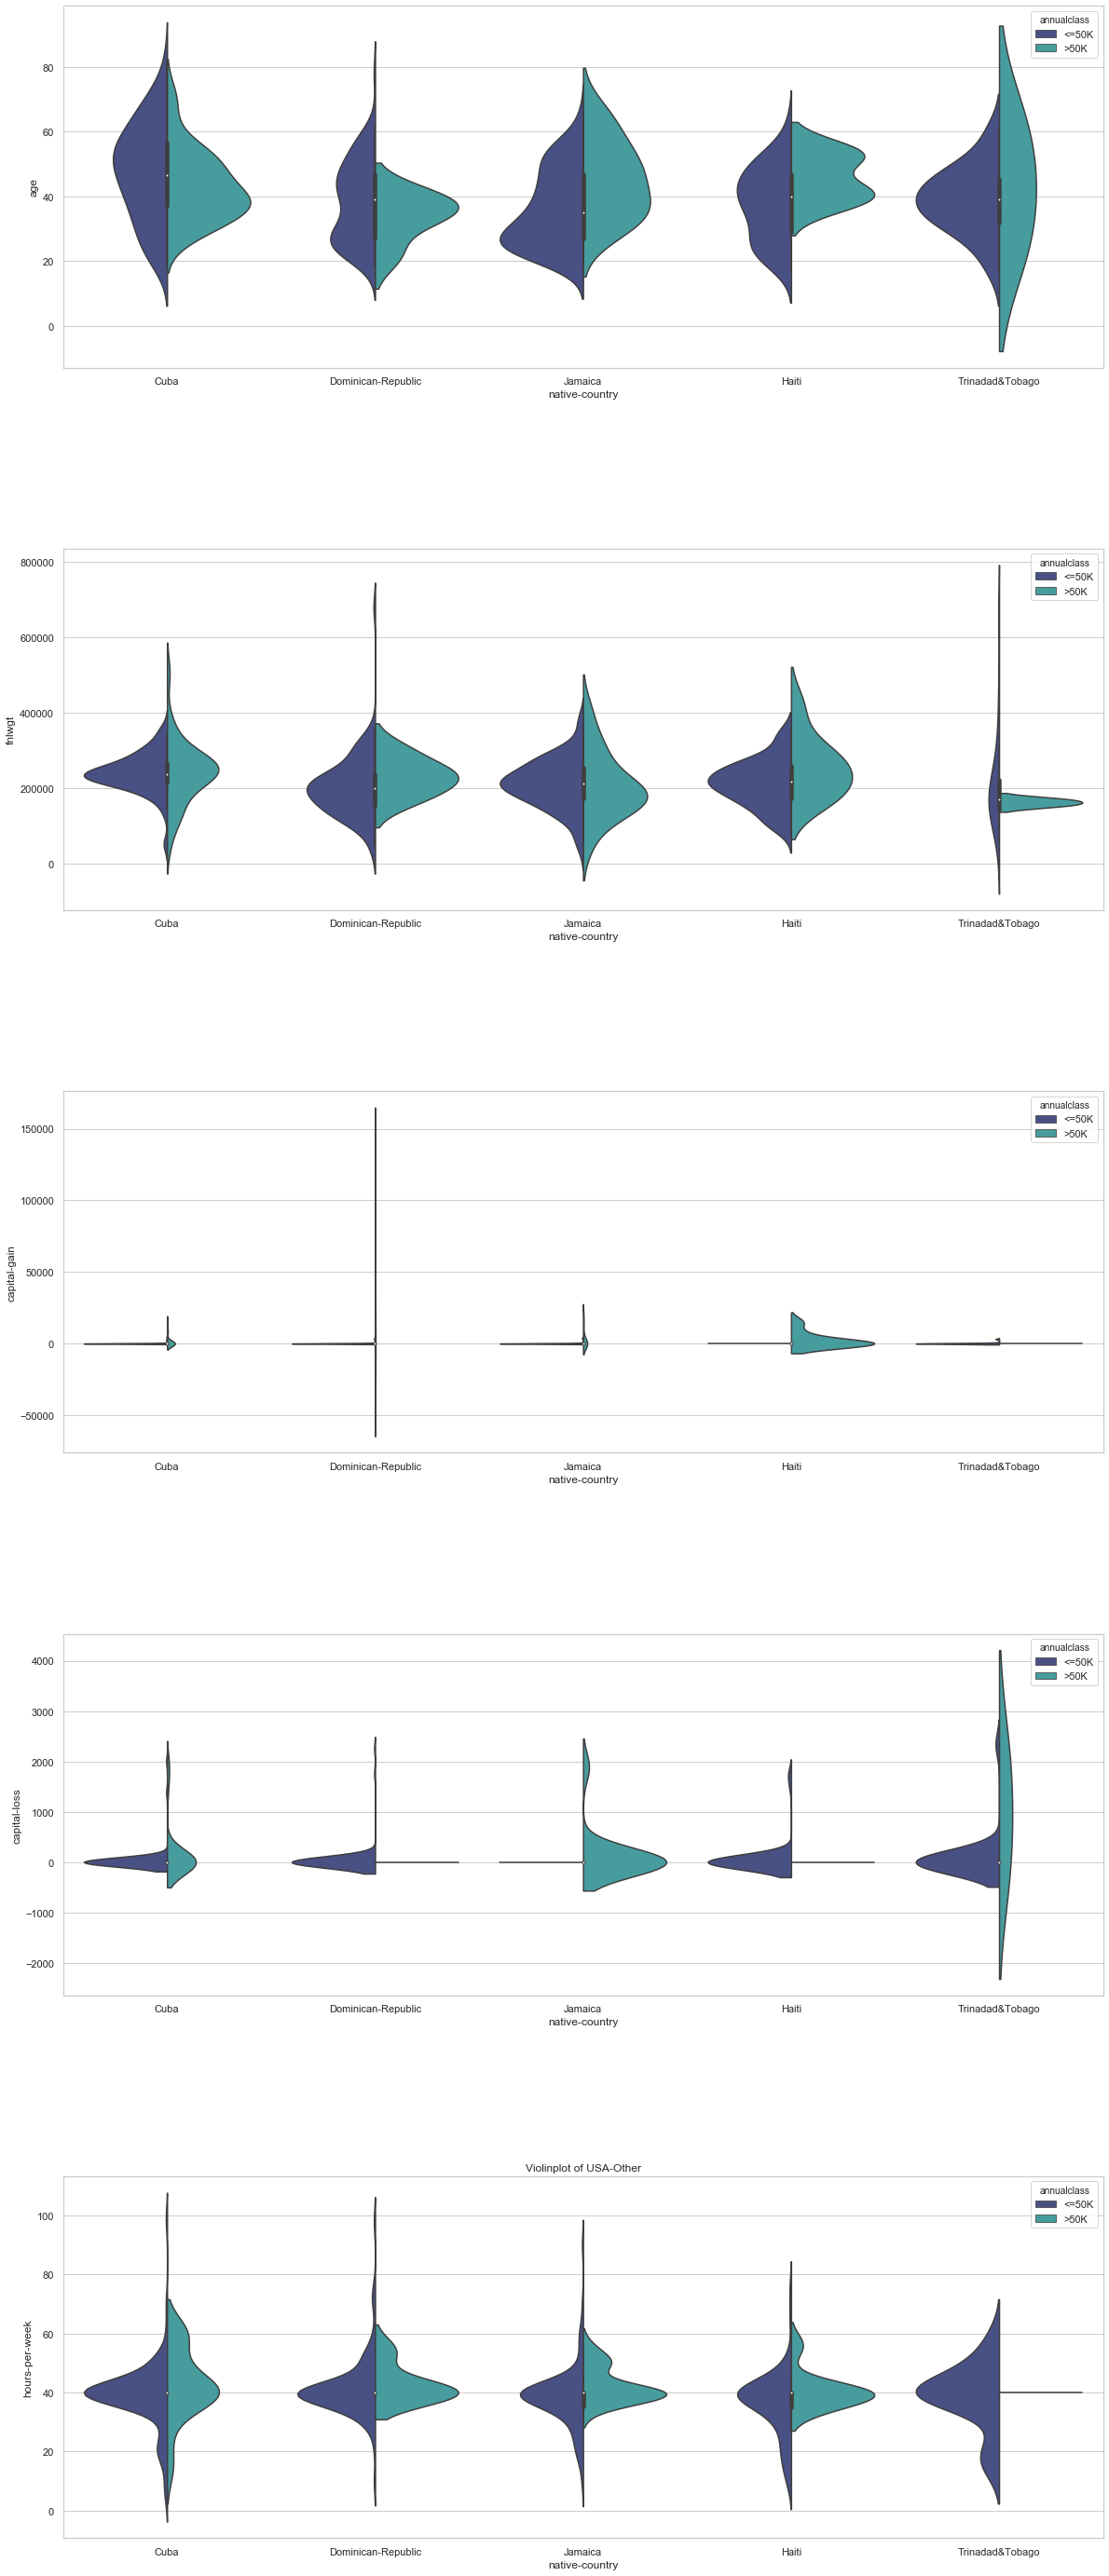

In [56]:
# Countries in the Caribbean
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='native-country', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True, 
                   order=['Cuba','Dominican-Republic','Jamaica', 'Haiti','Trinadad&Tobago'])

plt.title('Violinplot of {}'.format(cats))
plt.show()

#### Caribbean
- Age range for those making over 50K varies between countries in the Caribbean.
- Age range for those making below 50K varies between countries in the Caribbean.
- Fnlwgt is most frequently reported at around 20,000 dollars regardless of country or annual class.
- Hours worked per week is most frequently reported as 40 regardless of annual class.
    - Those earning over 50K tend to work between 50 and 60 hours more often.


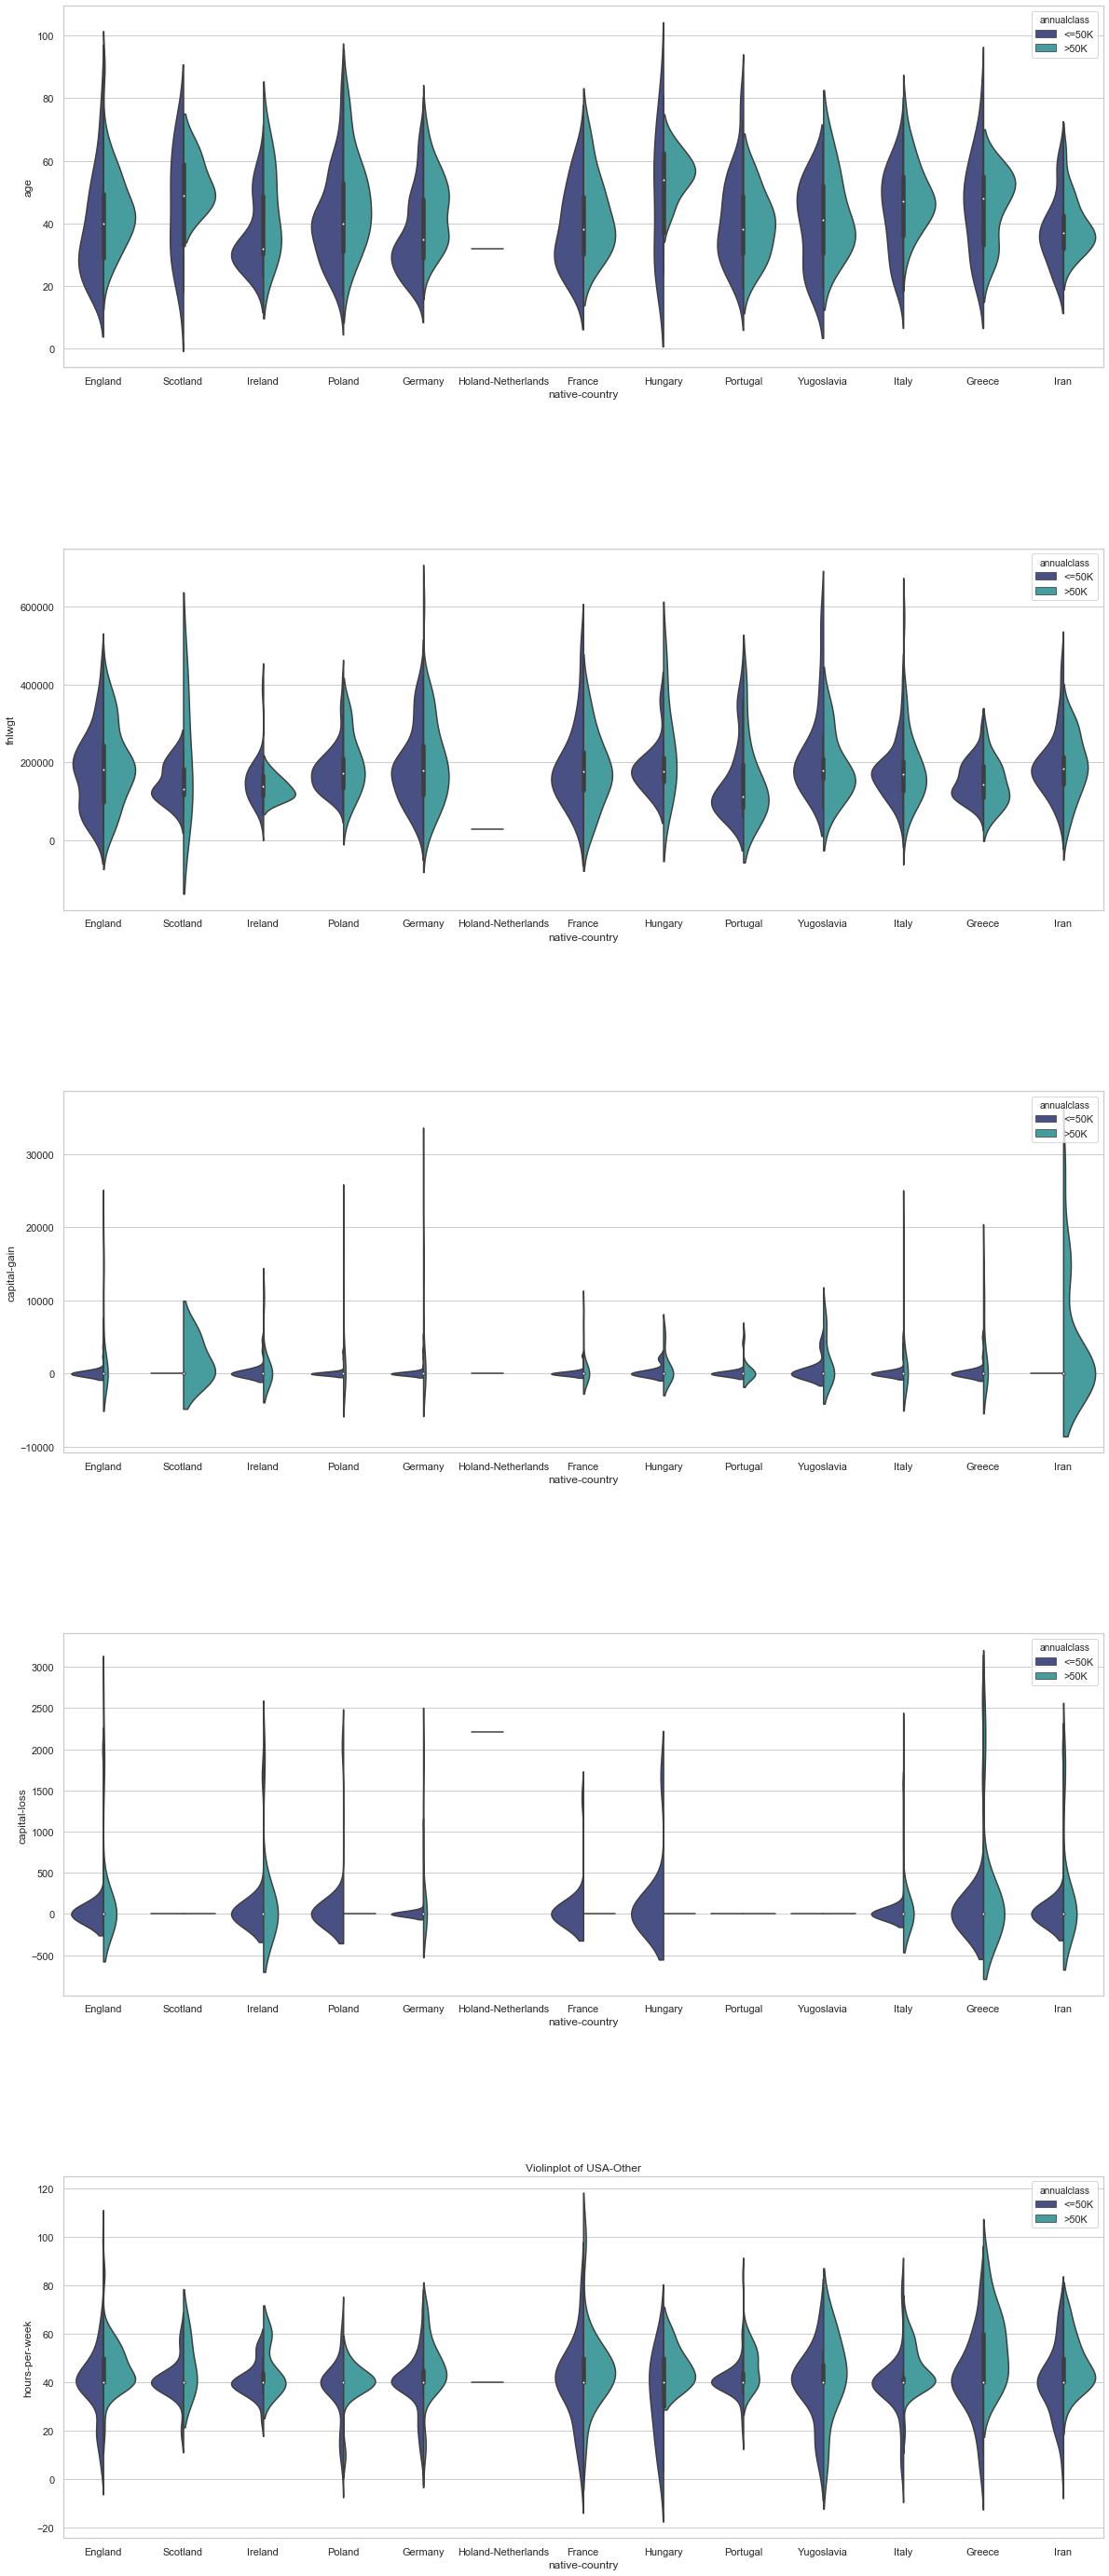

In [54]:
# Countries in Europe
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='native-country', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True, 
                   order=['England','Scotland','Ireland','Poland','Germany','Holand-Netherlands',
                          'France', 'Hungary','Portugal','Yugoslavia','Italy','Greece','Iran'])

plt.title('Violinplot of {}'.format(cats))
plt.show()

#### Europe
- Age range for those making over 50K varies between countries in Europe.
- Age range for those making below 50K varies between countries in Europe.
- Fnlwgt range varies between countries in Europe.
- Hours worked per week tends to be closer to 40 hours, but the range varies between countries in Europe.


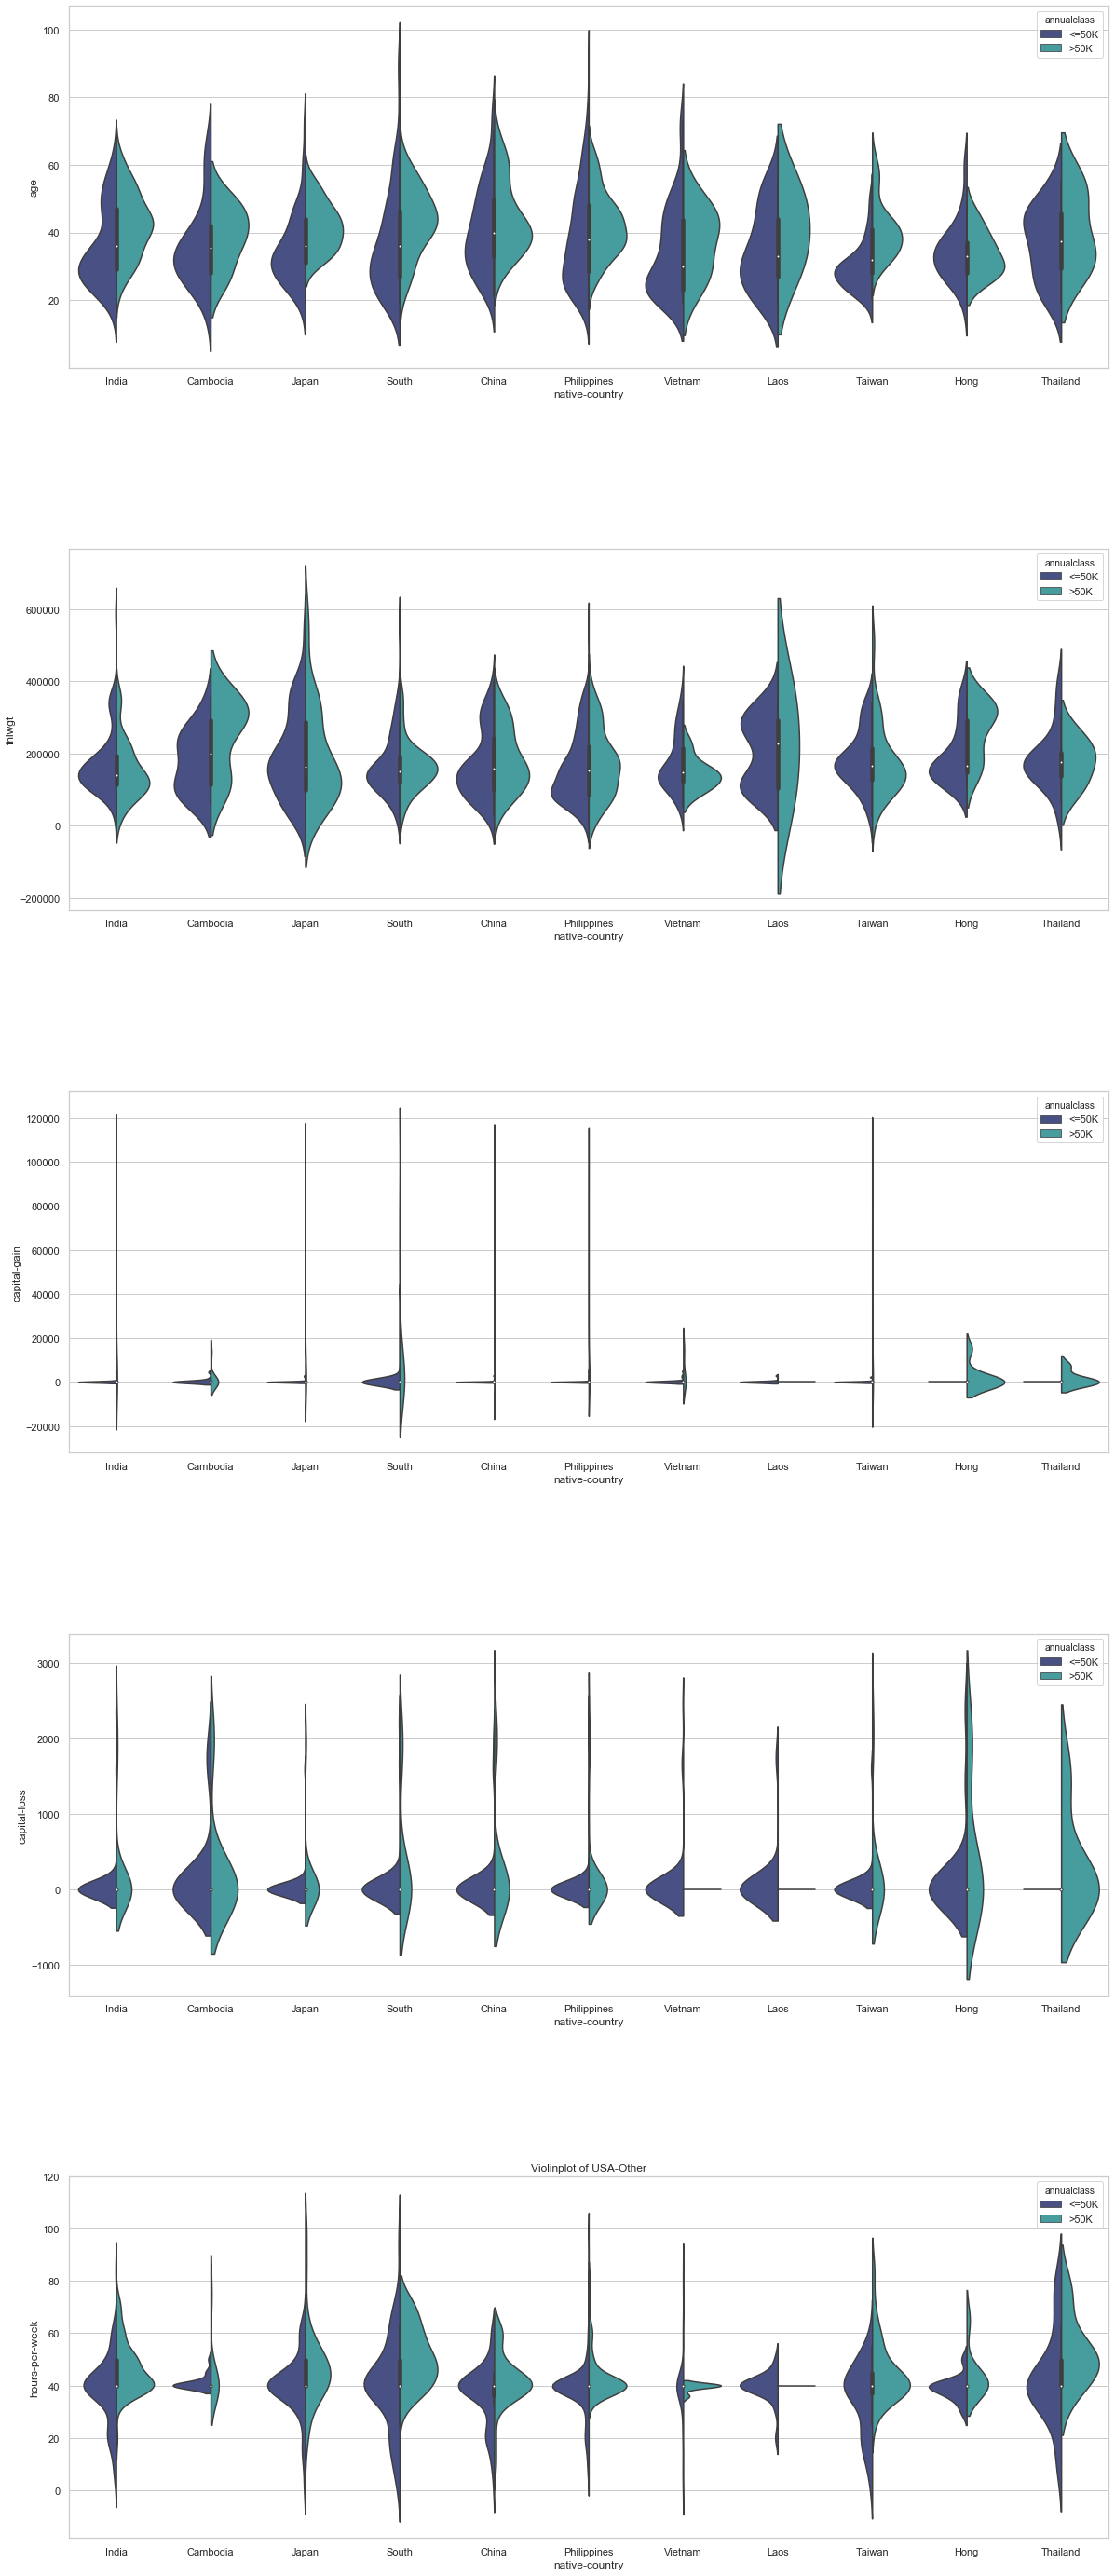

In [55]:
# Countries in Asia
plt.figure(1, figsize=(20,50))
ci=0
for cont in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    ci += 1
    plt.subplot(5,1,ci)

    plt.figure(1, figsize=(20,50))
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.violinplot(x='native-country', y=cont, hue='annualclass', data=fulldata, stat="count", palette = "mako", split=True, 
                   order=['India','Cambodia','Japan','South','China','Philippines', 'Vietnam',
                          'Laos', 'Taiwan','Hong','Thailand'])

plt.title('Violinplot of {}'.format(cats))
plt.show()

#### Asia
- Age range for those making over 50K varies between countries in Asia.
- Age range for those making below 50K varies between countries in Asia.
- Fnlwgt range varies between countries in Asia.
- Hours worked per week tends to be closer to 40 hours, but the range varies between countries in Asia.


### Population Ages
Most of the data comes from people between 32 and 41, followed by 22 to 31, and then by 42-51

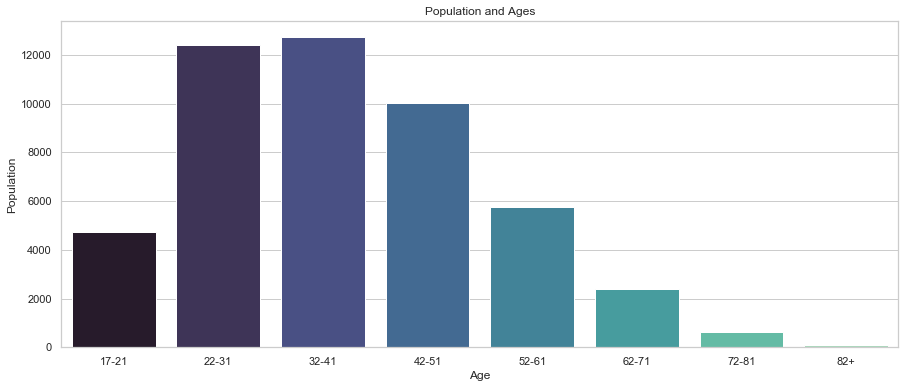

In [16]:
age_17_21 = fulldata.age[(fulldata.age >= 17) & (fulldata.age <= 21)]
age_22_31 = fulldata.age[(fulldata.age >= 22) & (fulldata.age <= 31)]
age_32_41 = fulldata.age[(fulldata.age >= 32) & (fulldata.age <= 41)]
age_42_51 = fulldata.age[(fulldata.age >= 42) & (fulldata.age <= 51)]
age_52_61 = fulldata.age[(fulldata.age >= 52) & (fulldata.age <= 61)]
age_62_71 = fulldata.age[(fulldata.age >= 62) & (fulldata.age <= 71)]
age_72_81 = fulldata.age[(fulldata.age >= 72) & (fulldata.age <= 81)]
age_82plus = fulldata.age[fulldata.age >= 82]

agegroup = ["17-21","22-31","32-41","42-51","52-61","62-71","72-81", "82+"]
agepop = [len(age_17_21.values),len(age_22_31.values),len(age_32_41.values),len(age_42_51.values),len(age_52_61.values),len(age_62_71.values),len(age_72_81.values),len(age_82plus.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agegroup,y=agepop, palette="mako")
plt.title("Population and Ages")
plt.xlabel("Age")
plt.ylabel("Population")
plt.show()

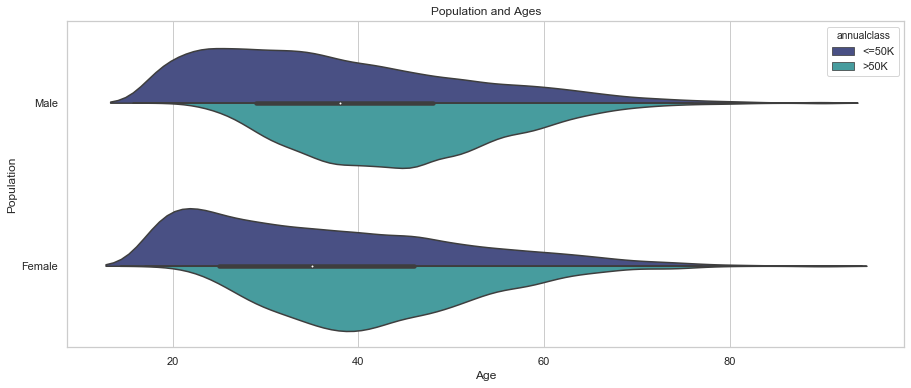

In [18]:
plt.figure(figsize=(15,6))
sns.violinplot(x=fulldata['age'],y=fulldata['sex'], hue=fulldata['annualclass'], palette="mako", split=True)
plt.title("Population and Ages")
plt.xlabel("Age")
plt.ylabel("Population")
plt.show()

## KMeans Clustering

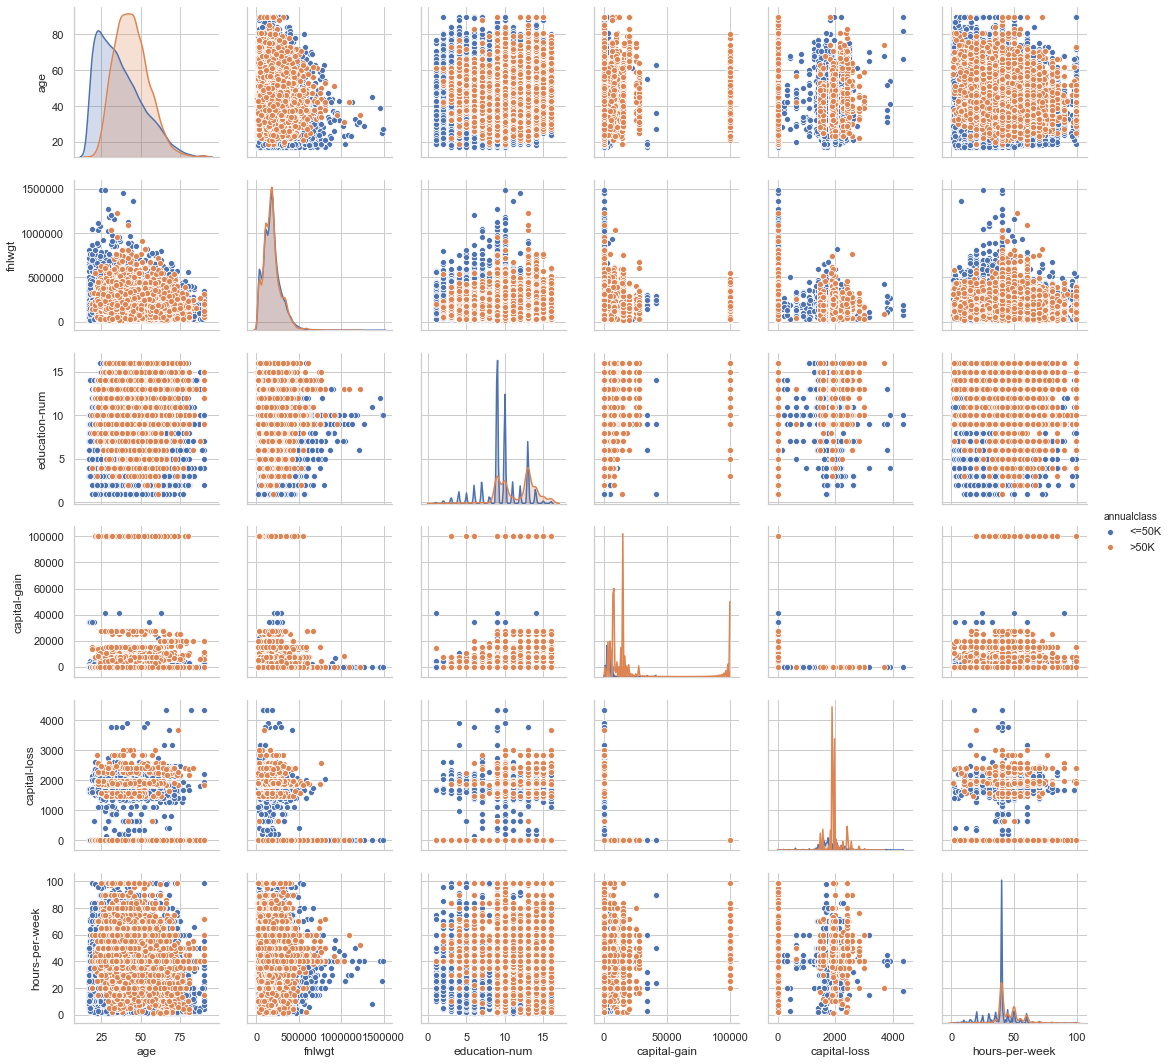

In [19]:
sns.pairplot(data=fulldata, hue="annualclass")

### Correlation Matrix

This shows the correlation between each of the continuous variables. None of the continuous variables are strongly correlated with any other continuous variables.

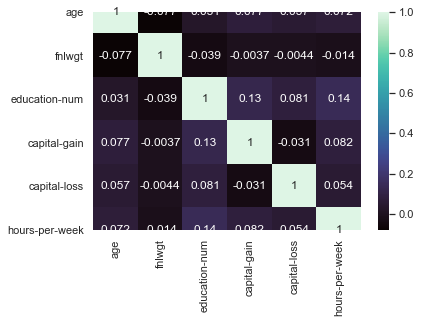

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = fulldata.corr()
sns.heatmap(corrMatrix, annot=True,cmap="mako")
plt.show()

### Clustering Continuous Variables 
The following blocks of code use the K-Means algorithm to find clusters between each pairing of continuous variables

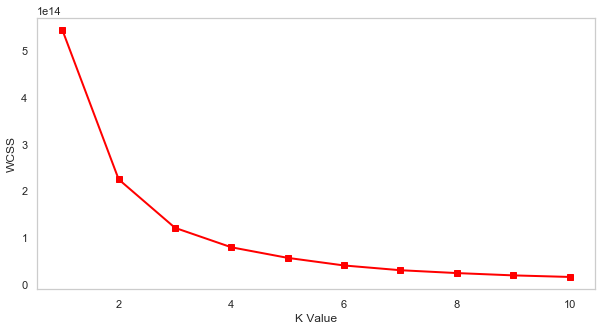

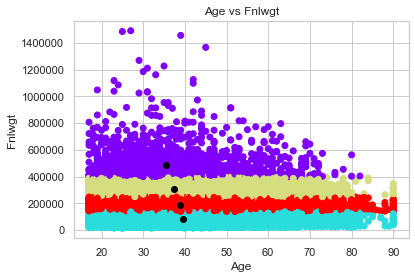

[[3.54004034e+01 4.86010325e+05]
 [3.95536979e+01 8.63862686e+04]
 [3.73205510e+01 3.07031559e+05]
 [3.88324063e+01 1.88113172e+05]]


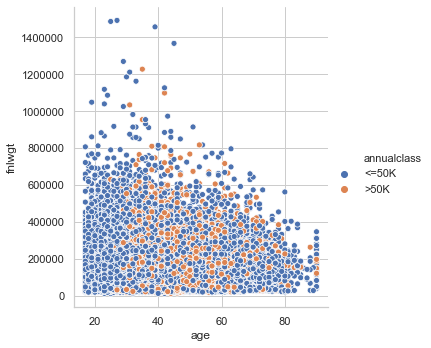

In [58]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['age','fnlwgt']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Age vs Fnlwgt')
plt.xlabel('Age')
plt.ylabel('Fnlwgt')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='age',y='fnlwgt', hue = 'annualclass',data = fulldata)

### Age VS Fnlwgt
- K-Means Elbow plot shows local linearity after 4 clusters.
- As Age increases, Fnlwgt decreases. 
- 4 Clusters exist with centroids at:
    - 35 years with Fnlwgt at 486,010 dollars
    - 37.3 years with Fnlwgt at 307,031 dollars
    - 38.8 years with Fnlwgt at 188,113 dollars
    - 39.5 years with Fnlwgt at 86,386 dollars
- Those younger than about 30 rarely make over 50K.
- Between 30 and 60 annual classes are evenly mixed.


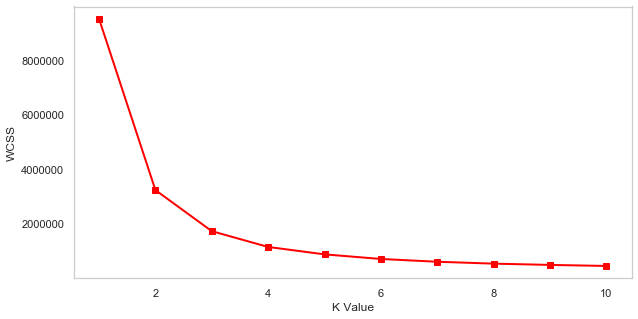

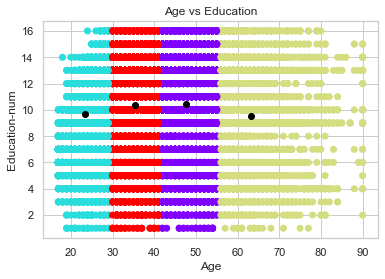

[[47.71723759 10.42779698]
 [23.47674819  9.70120565]
 [63.31434059  9.56722151]
 [35.41997264 10.35242004]]


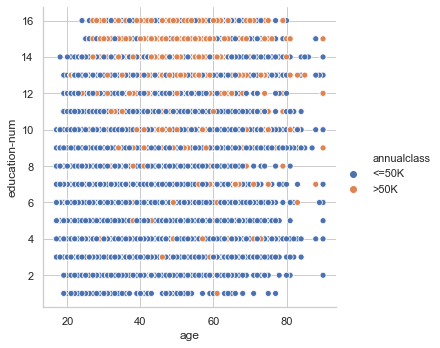

In [59]:
# Initializing variables to find appropriate number of clusters
x2=fulldata.loc[:,['age','education-num']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x2)
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Age vs Education')
plt.xlabel('Age')
plt.ylabel('Education-num')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='age',y='education-num',hue='annualclass', data = fulldata)

### Age VS Education Num
- K-Means elbow plot shows local linearity after 4 clusters.
- As Age increases Education number remains constant for all education numbers.
- 4 clusters exist with centroids at:
    - 23 years with HS graduate education
    - 35 years with some college education
    - 47 years with some college education
    - 63 years with HS graduate education
- As Education level increases people are more likely to report making over 50K.


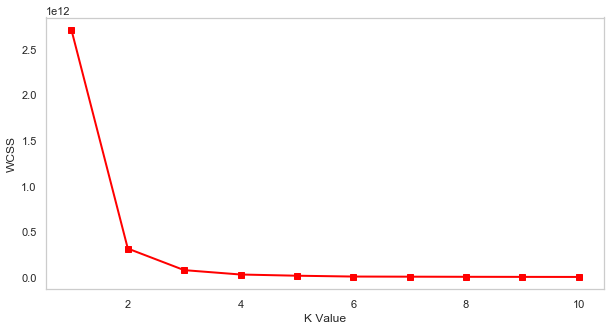

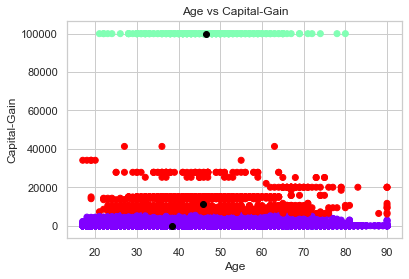

[[3.83049029e+01 1.35837214e+02]
 [4.66106557e+01 9.99990000e+04]
 [4.59005756e+01 1.14925343e+04]]


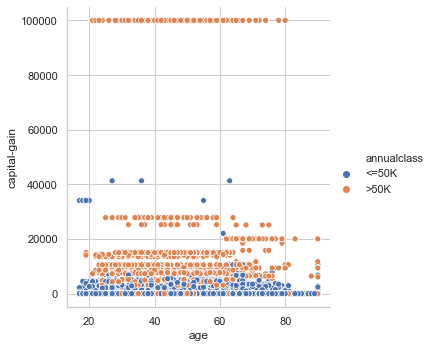

In [60]:
# Initializing variables to find appropriate number of clusters
x3=fulldata.loc[:,['age','capital-gain']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(x3)
plt.scatter(x3[:,0], x3[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Age vs Capital-Gain')
plt.xlabel('Age')
plt.ylabel('Capital-Gain')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='age',y='capital-gain',hue='annualclass', data = fulldata)

### Age VS Capital Gain
- K-Means elbow plot shows local linearity after 3 clusters.
- As Age increases Capital gain remains constant.
- 3 clusters exist with centroids at:
    - 38.3 years with 135.84 dollars capital gain
    - 45.9 years with 1,1492.5 dollars capital gain
    - 46.6 years with 99,999 dollars capital gain
- As capital gain increases people are more likely to report making over 50K.

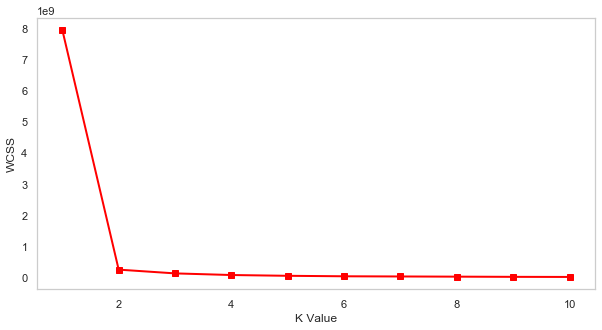

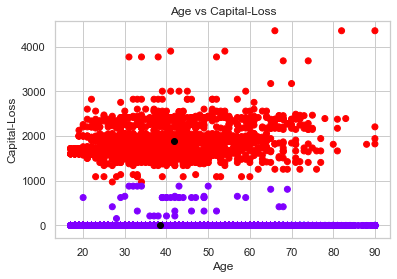

[[3.84932730e+01 5.19902152e-01]
 [4.17722197e+01 1.89797186e+03]]


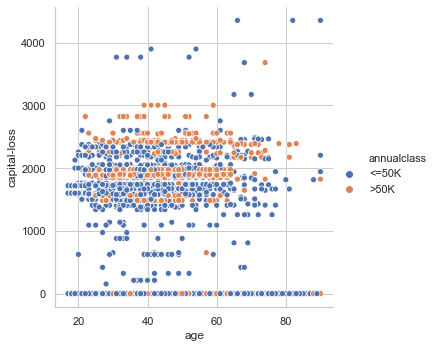

In [61]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['age','capital-loss']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=2)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Age vs Capital-Loss')
plt.xlabel('Age')
plt.ylabel('Capital-Loss')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='age',y='capital-loss',hue='annualclass', data = fulldata)

### Age VS Capital Loss
- K-Means elbow plot shows local linearity after 2 clusters.
- As age increases, Capital loss remains constant.
- 2 Clusters exist with centroids at:
    - 38.49 years with 0.52 dollars capital loss
    - 41.77 years with 1,897.97 dollars capital loss
- Those who earn over 50K annually tend to report around 1.5K, 2K, 2.5K, or 3K worth of capital loss.

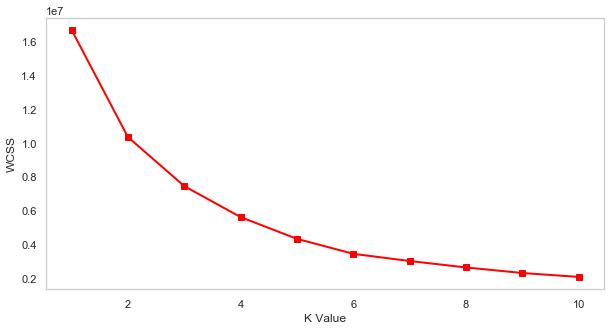

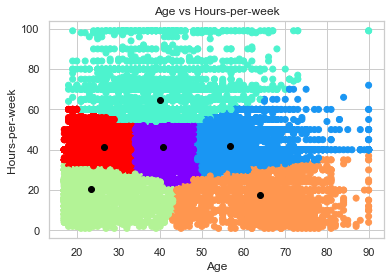

[[40.6073895  41.37375691]
 [56.74767749 41.94598004]
 [39.96457042 64.51594331]
 [23.46919526 20.47742324]
 [64.04097189 17.31634111]
 [26.54346743 41.27810609]]


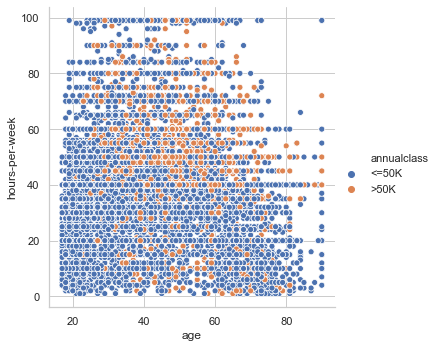

In [62]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['age','hours-per-week']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=6)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Age vs Hours-per-week')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='age',y='hours-per-week',hue='annualclass', data = fulldata)

### Age VS Hours per week
- K-Means elbow plot shows local linearity after 6 clusters.
- As age increases from 0 to 40 cluster boundaries show a reduction in hours per week.
- As age increases from after 40 cluster boundaries show an increase in hours per week.
- 6 Clusters exists with centroids at:
    - 23.469 years working 20.477 hours per week
    - 26.54 years working 41.278 hours per week
    - 39.96 years working 64.516 hours per week
    - 40.61 years working 41.374 hours per week
    - 56.75 years working 41.946 hours per week
    - 64.04 years working 17.316 hours per week
- Below 40 hours per week most people make below 50K.
- Between 40 and 60 hours per week people report making over 50K more frequently.
- After 60 hours per week annual classes are evenly mixed.

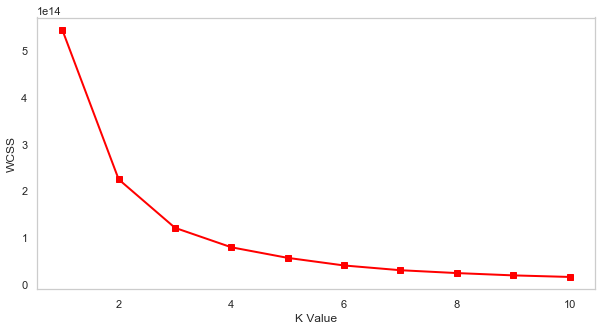

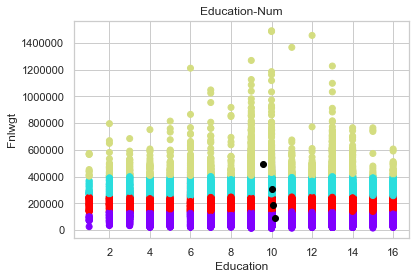

[[1.01766038e+01 8.71257663e+04]
 [1.00094097e+01 3.09733034e+05]
 [9.60212766e+00 4.90806778e+05]
 [1.00754461e+01 1.89318836e+05]]


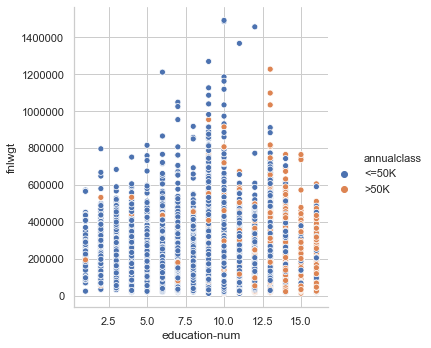

In [75]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['education-num','fnlwgt']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Education-Num')
plt.xlabel('Education')
plt.ylabel('Fnlwgt')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='education-num',y='fnlwgt',hue='annualclass', data = fulldata)

### Education Num VS Fnlwgt
- K-Means Elbow plot shows local linearity after 4 clusters.
- As Education number increases to some college (10) Fnlwgt increases.
- After some college (10) fnlwgt is constant with a peak at Bachelors (13)
- 4 Clusters exist with centroids at:
    - HS Graduate (9) education with 490,806.78 dollars fnlwgt score
    - Some College (10) education with 87,125.76 dollars fnlwgt score
    - Some College (10) education with 189,318.84 dollars fnlwgt score
    - Some College (10) education with 309,733 dollars fnlwgt score
- As Education increases more people report earning over 50K.
- As fnlwgt increases education level increases.
    - Reflecting each level contributing to student debt


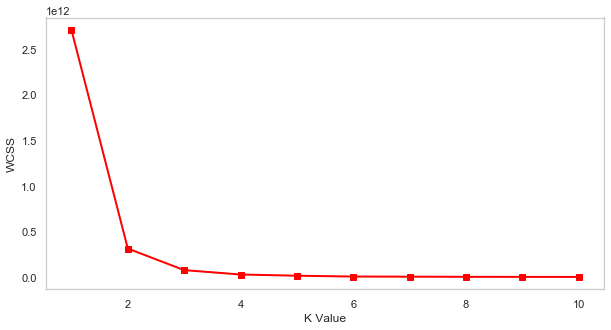

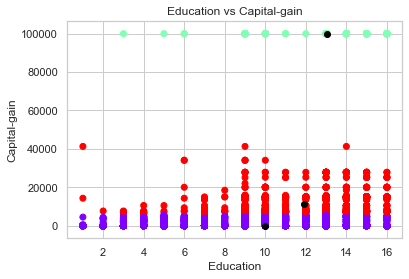

[[9.98729839e+00 1.35837214e+02]
 [1.30245902e+01 9.99990000e+04]
 [1.19199372e+01 1.14925343e+04]]


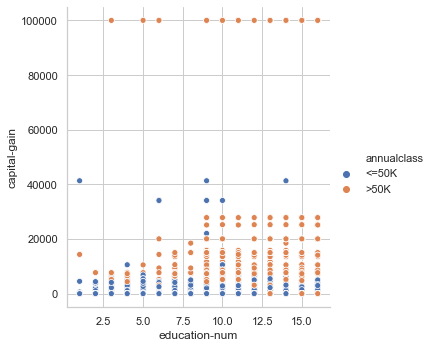

In [67]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['education-num','capital-gain']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Education vs Capital-gain')
plt.xlabel('Education')
plt.ylabel('Capital-gain')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='education-num',y='capital-gain',hue='annualclass', data = fulldata)

### Education Num VS Capital Gain
- K-Means Elbow plot shows local linearity after 3 clusters.
- As education number increases capital gain increases.
- All educations except Preschool, 1st-4th, 7th-8th, 11th, and 12th report at least 1 capital gain value at 99,999 dollars.
- 3 Clusters exist with centroids at:
    - Some College (9.987) education 135.84 dollars capital gain
    - Assoc-acdm (11.9) education 11,492.53 dollars capital gain
    - Bachelors (13) education 99,999 dollars capital gain
- As capital gain and education level increase people report earning over 50K more frequently

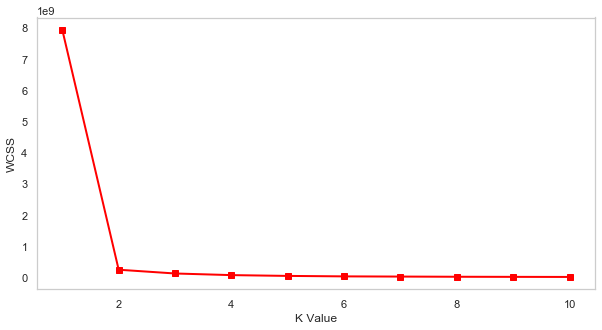

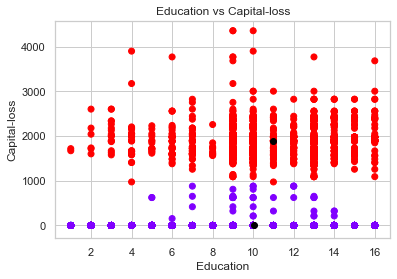

[[1.00340321e+01 5.19902152e-01]
 [1.09950871e+01 1.89797186e+03]]


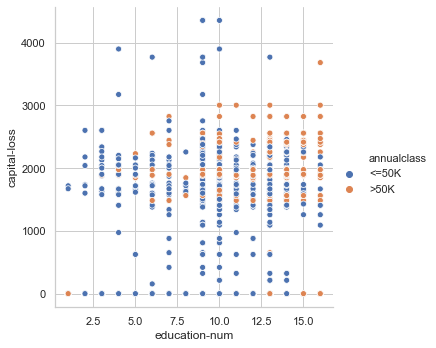

In [68]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['education-num','capital-loss']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot
kmeans = KMeans(n_clusters=2)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Education vs Capital-loss')
plt.xlabel('Education')
plt.ylabel('Capital-loss')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='education-num',y='capital-loss',hue='annualclass', data = fulldata)

### Education Num VS Capital Loss
- K-Means Elbow plot shows local linearity after 2 clusters.
- As education number increases capital loss remains constant.
- 2 clusters exists with centroids at:
    - Some College (10) education 0.52 dollars capital loss
    - Assoc-voc (10.995) education 1,897.97 dollars capital loss
- Those who make over 50K yearly and have capital loss report roughly the following values:
    - 1.5K capital loss
    - 1.8K to 3K capital loss
- As capital loss and education level increase people report earning over 50K more frequently

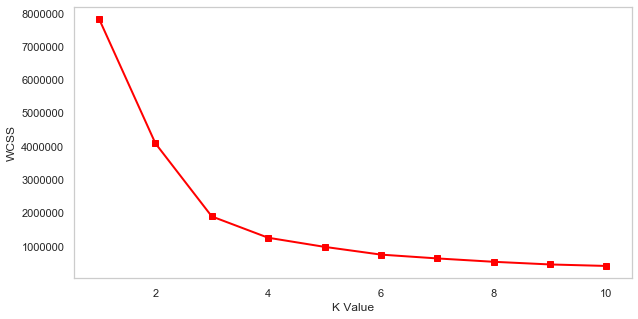

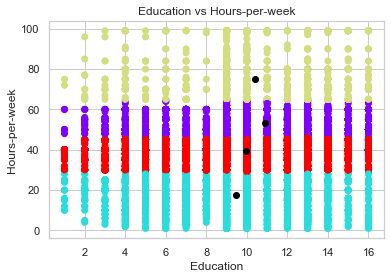

[[10.89724423 53.14091264]
 [ 9.45681226 17.79498044]
 [10.41377171 75.18548387]
 [ 9.95138651 39.45158881]]


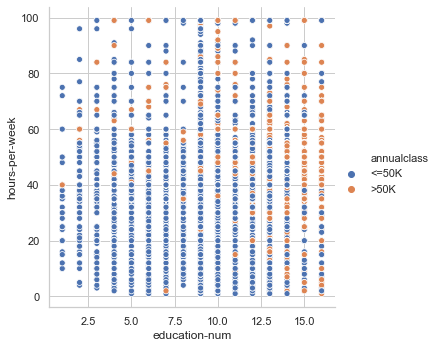

In [69]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['education-num','hours-per-week']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Education vs Hours-per-week')
plt.xlabel('Education')
plt.ylabel('Hours-per-week')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='education-num', y='hours-per-week',hue='annualclass', data = fulldata)

### Education Num VS Hours per week
- K-Means elbow plot shows local linearity after 4 clusters.
- As education number increases hours per week worked remains constant.
- 4 clusters exist with centroids at:
    - Between HS graduate and Some College (9.45) education, 17.79 hours worked weekly.
    - Between HS graduate and Some College (9.95) education, 39.45 hours worked weekly.
    - Some college (10.4) education, 75.18 hours worked weekly
    - Some college (10.89) education, 53.14 hours worked weekly
- As education and hours per week increase people report earning over 50K more frequently.


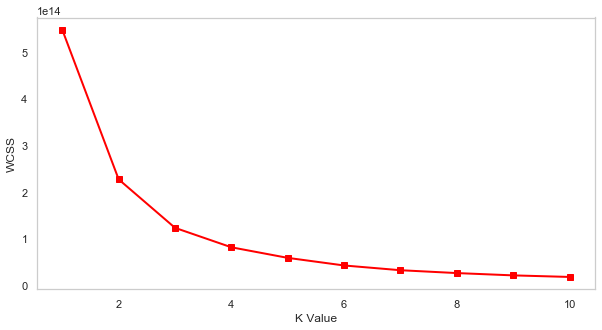

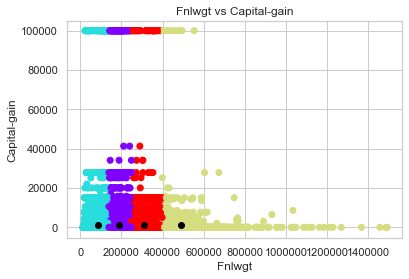

[[189136.49477447   1081.64213003]
 [ 87064.5482652    1136.88206032]
 [488019.59205775   1041.96338319]
 [308795.7885413     977.81074111]]


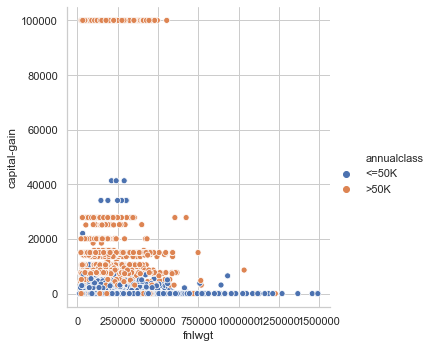

In [64]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['fnlwgt','capital-gain']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Fnlwgt vs Capital-gain')
plt.xlabel('Fnlwgt')
plt.ylabel('Capital-gain')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='fnlwgt',y='capital-gain',hue='annualclass', data = fulldata)

### Fnlwgt VS Capital Gain
- K-Means elbow plot shows local linearity after 4 clusters.
- As fnlwgt increases, capital gain decreases.
- 4 clusters exist with centroids at:
    - 87,064.54 dollars fnlwgt, 1,136.88 dollars capital gain
    - 189,136.49 dollars fnlwgt, 1,081.64 dollars capital gain
    - 308,795.79 dollars fnlwgt, 977.81 dollars capital gain
    - 499,019.59 dollars fnlwgt, 1,041.96 dollars capital gain
- As capital gain increases people are more likely to report earning over 50K yearly.


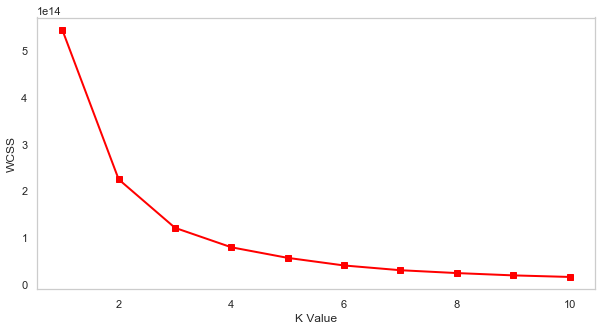

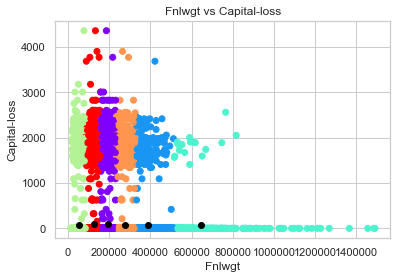

[[1.92421817e+05 8.92223161e+01]
 [3.87201520e+05 8.42386072e+01]
 [6.46055298e+05 7.27549669e+01]
 [5.25607097e+04 7.70717772e+01]
 [2.75483177e+05 8.27371457e+01]
 [1.24075700e+05 9.56571225e+01]]


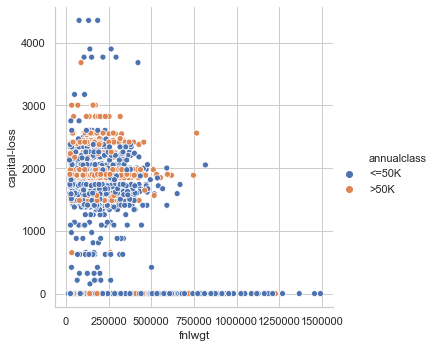

In [76]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['fnlwgt','capital-loss']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot
kmeans = KMeans(n_clusters=6)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Fnlwgt vs Capital-loss')
plt.xlabel('Fnlwgt')
plt.ylabel('Capital-loss')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='fnlwgt',y='capital-loss',hue='annualclass', data = fulldata)

### Fnlwgt VS Capital Loss
- K-Means elbow plot shows local linearity after 6 clusters.
- As fnlwgt increases, capital loss decreases slightly.
- 6 clusters exist with centroids at:
    - 52,560.7097 dollars fnlwgt, 77.07 dollars capital loss
    - 124,075.700 dollars fnlwgt, 95.66 dollars capital loss
    - 192,421.817 dollars fnlwgt, 89.22 dollars capital loss
    - 275,483.177 dollars fnlwgt, 82.74 dollars capital loss
    - 387,201.520 dollars fnlwgt, 84.24 dollars capital loss
    - 646,055.298 dollars fnlwgt, 72.75 dollars capital loss
- As capital loss increases more people reported earning over 50K yearly.
    - Most reported over 50K when capital loss was around 2K, 2.5K, and 3K and fnlwgt was between 0 dollars and 500,000 dollars.

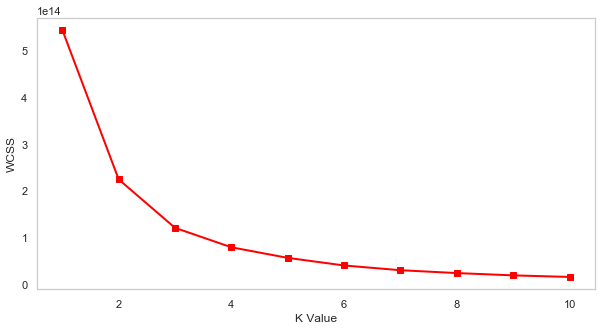

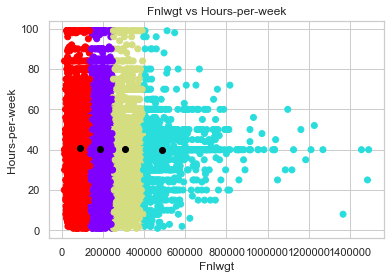

[[1.88113172e+05 4.02707457e+01]
 [4.86010325e+05 3.97297025e+01]
 [3.07031559e+05 4.05337741e+01]
 [8.63862686e+04 4.06594984e+01]]


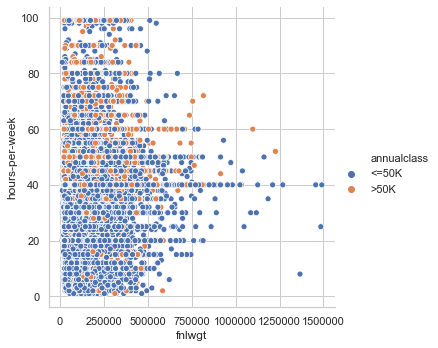

In [80]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['fnlwgt','hours-per-week']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Fnlwgt vs Hours-per-week')
plt.xlabel('Fnlwgt')
plt.ylabel('Hours-per-week')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='fnlwgt',y='hours-per-week',hue='annualclass', data = fulldata)

### Fnlwgt VS Hours per week
- K-Means elbow plot shows local linearity after 4 clusters.
- As fnlwgt increases, Hours per week increases from 0 to 40.
- As fnlwgt increases, hours per week decreases from 100 to 40.
- 4 Clusters exist with centroids at:
    - 86,922,70 dollars fnlwgt, 40.62 hours worked weekly
    - 189,170.95 dollars fnlwgt, 40.30 hours worked weekly
    - 309,960.05 dollars fnlwgt, 40.51 hours worked weekly
    - 491,922.83 dollars fnlwgt, 39.34 hours worked weekly
- As hours per week increases more people reported earning over 50K yearly.
- People who work less than 40 hours weekly rarely report earning over 50K yearly.

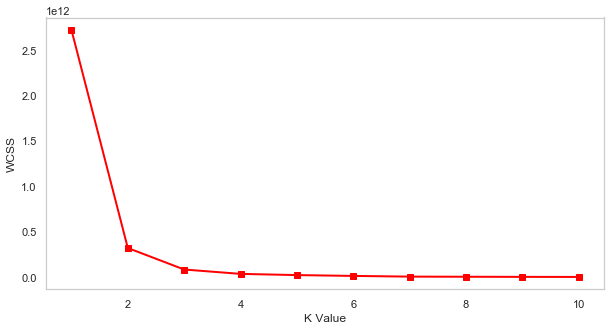

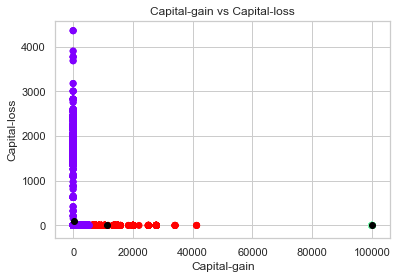

[[ 1.35837214e+02  9.15412856e+01]
 [ 9.99990000e+04  9.94759830e-14]
 [ 1.14925343e+04 -2.79953838e-12]]


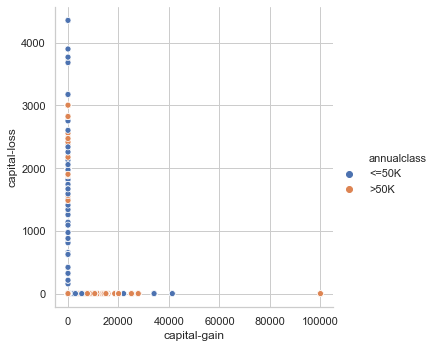

In [78]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['capital-gain','capital-loss']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Capital-gain vs Capital-loss')
plt.xlabel('Capital-gain')
plt.ylabel('Capital-loss')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='capital-gain',y='capital-loss',hue='annualclass', data = fulldata)

### Capital Gain Vs Capital Loss
- K-Means elbow plot shows local linearity after 3 clusters.
- Those who report large capital gain do not report capital loss.
- Those who report small capital gain report small capital loss.
- 3 clusters exist with centroids at:
    - 135.84 dollars capital gain, 91.54 dollars capital loss
    - 99,999 dollars capital gain, 0.00 dollars capital loss
    - 11,492.53 dollars capital gain, 0.00 dollars capital loss
- People earning over 50K annually, report capital gain more often.
- People earning below 50K annually, report capital loss more often.

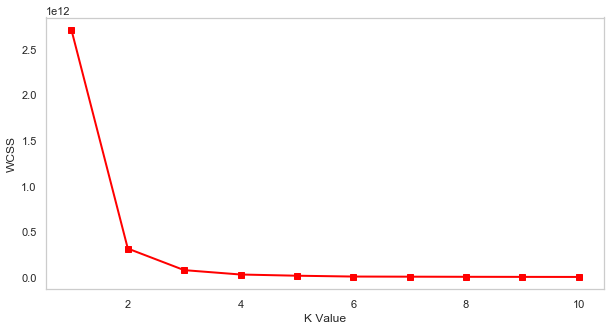

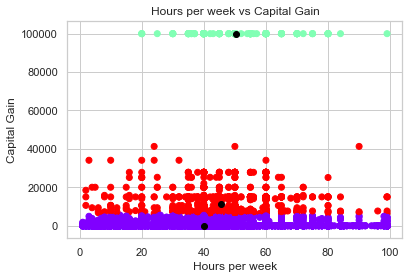

[[4.01616510e+01 1.35837214e+02]
 [5.04754098e+01 9.99990000e+04]
 [4.55086342e+01 1.14925343e+04]]


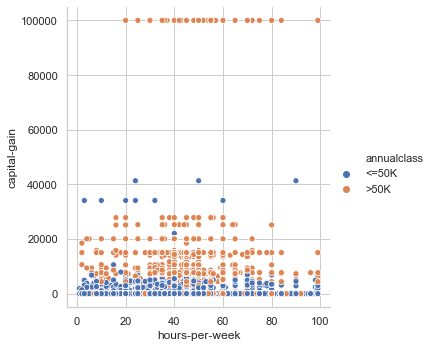

In [71]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['hours-per-week','capital-gain']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot
kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Hours per week vs Capital Gain')
plt.xlabel('Hours per week')
plt.ylabel('Capital Gain')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='hours-per-week',y='capital-gain',hue='annualclass', data = fulldata)

### Hours per week VS Capital Gain
- K-Means elbow plot shows local linearity after 3 clusters.
- As hours per week increases capital gain remains constant.
- 3 clusters exist with centroids at:
    - 40.16 hours per week, 135.84 dollars capital gain
    - 50.475 hours per week, 99,999 dollars capital gain
    - 45.51 hours per week, 11,492.53 dollars capital gain
- As capital gain and hours per week increase, people report earning over 50K annually more frequently.

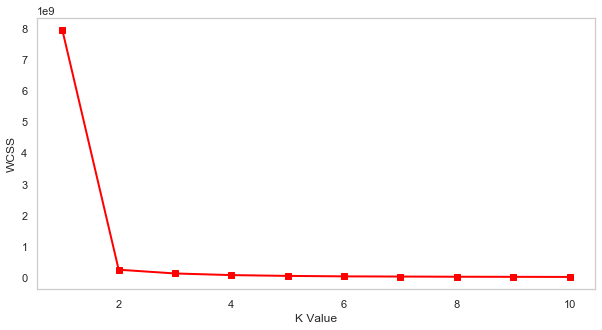

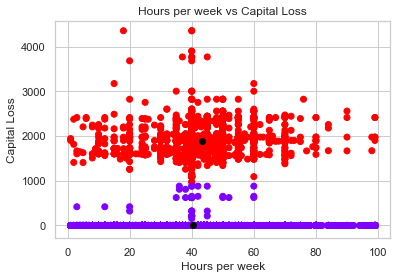

[[4.02820848e+01 5.19902152e-01]
 [4.33425636e+01 1.89797186e+03]]


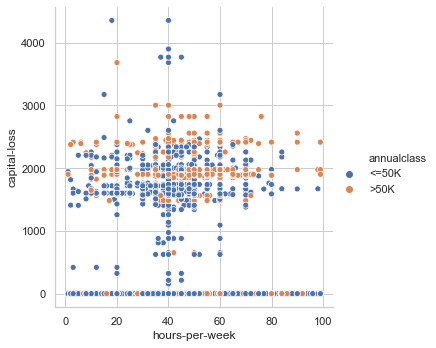

In [72]:
# Initializing variables to find appropriate number of clusters
x1=fulldata.loc[:,['hours-per-week','capital-loss']].values
from sklearn.cluster import KMeans
wcss= []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red",marker="s")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# Setting quantity of clusters for relational scatterplot 
kmeans = KMeans(n_clusters=2)

label = kmeans.fit_predict(x1)
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Hours per week vs Capital Loss')
plt.xlabel('Hours per week')
plt.ylabel('Capital Loss')
plt.show()

# Printing relational scatter plot with an overlay of annual class
# Shows how this relationship impacts annual class
print(kmeans.cluster_centers_)
sns.relplot(x='hours-per-week',y='capital-loss',hue='annualclass', data = fulldata)

### Hours per week VS Capital Loss
- K-Means elbow plot shows local linearity after 2 clusters.
- As hours per week increases, capital loss remains constant.
- 2 clusters exist with centroids at:
    - 40.28 hours per week, 0.52 dollars capital loss
    - 43.34 hours per week 1,897.97 dollars capital loss
- As capital loss increases, people report earning over 50K more frequently.